<a href="https://colab.research.google.com/github/MazurovaNN/Data-Science/blob/main/lesson5_dz5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание
Вам предстоит решить типичную для продуктовой аналитики задачу прогноза LTV пользователя. Для этого необходимо:

1) провести исследовательский анализ данных,

2) визуализировать результаты и сделать из них выводы,

3) провести предобработку признаков (возможно создать новые),

4) обучить модели, и подобрать для каждой из них оптимальные гиперпараметры,

5) оценить работу моделей и сравнить их между собой, выбрать итоговую и объяснить свой выбор,

6) проинтерпретировать получившиеся результаты (что и как влияет на LTV пользователя).
Данные

В файле LTV.csv представлены данные о пользователях с автомобильной страховкой, собранных системой аналитики компании IBM.
 https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/

Описание данных:

Customer - идентификатор пользователя

State - штат

Customer Lifetime Value - LTV пользователя

Response - взаимодействие с рекламой

Coverage - тип страхового покрытия

Education - образование

Effective to date - срок действия страховки

EmploymentStatus - трудоустройство

Gender - пол

Income - доход

Location code - тип местности в которой проживает пользователь

Marital Status - семейное положение

Monthly Premium Auto

Months Since Last Claim - месяцев с последнего требования по выплате компенсации

Months Since Policy Inception - месяцев с открытия страховки

Number of Open Complaints - количество незакрытых жалоб

Number of Policies - количество полисов

Policy Type - тип страховки

Policy - страховка

Renew Offer Type - обновленный тип предложения

Sales Channel - канал продаж

Total Claim Amount - сумма выплаченных компенсаций

Vehicle Class - класс автомобиля

Vehicle Size - размер автомобиля

In [ ]:
!pip freeze requiements.txt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
train_data = pd.read_csv('LTV.csv')

train_data.sample(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
7151,YC53575,Oregon,8509.453945,No,Extended,High School or Below,1/24/11,Unemployed,M,0,...,20,0,2,Personal Auto,Personal L2,Offer2,Branch,590.400000,Four-Door Car,Medsize
1386,JL59571,Oregon,4607.244307,No,Basic,Bachelor,1/7/11,Disabled,F,17343,...,92,0,5,Corporate Auto,Corporate L3,Offer2,Branch,208.659743,Two-Door Car,Medsize
6202,OF20965,Nevada,7284.363465,No,Extended,Bachelor,1/6/11,Employed,F,67780,...,72,0,3,Personal Auto,Personal L2,Offer3,Call Center,601.455036,Four-Door Car,Small
2602,BN80677,Oregon,12734.212530,No,Extended,Bachelor,1/7/11,Employed,M,25023,...,38,0,2,Corporate Auto,Corporate L3,Offer1,Branch,397.139856,Two-Door Car,Medsize
1467,YY11432,Oregon,16515.009270,No,Extended,High School or Below,2/1/11,Employed,F,51725,...,16,1,2,Personal Auto,Personal L3,Offer1,Agent,159.004261,SUV,Medsize
2389,TX39594,Arizona,2452.491364,No,Basic,High School or Below,1/25/11,Employed,F,51085,...,58,1,1,Personal Auto,Personal L3,Offer3,Call Center,406.902001,Two-Door Car,Small
5772,PV62583,Nevada,9799.175061,No,Extended,College,1/3/11,Medical Leave,M,22166,...,22,0,6,Personal Auto,Personal L3,Offer1,Web,604.800000,SUV,Medsize
2728,AW71157,California,5531.723723,No,Basic,College,1/16/11,Employed,M,50097,...,81,0,5,Personal Auto,Personal L1,Offer3,Web,17.484679,Four-Door Car,Medsize
4543,GT65478,Oregon,8217.427595,No,Basic,College,1/19/11,Employed,F,84815,...,37,0,2,Personal Auto,Personal L1,Offer1,Agent,279.996658,Four-Door Car,Medsize
2909,BE65350,Oregon,5261.037541,No,Basic,High School or Below,1/11/11,Employed,F,43573,...,64,0,5,Personal Auto,Personal L3,Offer1,Agent,409.684798,Two-Door Car,Large


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# Выделим матрицу признаков и вектор с целевой переменной в тренировочной выборке

In [ ]:
X = train_data.drop('Response', axis = 1)
y = train_data['Response']

## Выделим численные признаки от остальных

In [ ]:
num_cols = []
str_cols = []

cols_and_type = X.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('int64', 'float64'):
        num_cols.append(col)
    else:
        str_cols.append(col)

print(num_cols)

['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class']


In [ ]:
cols_and_type

{'Customer': dtype('int64'),
 'State': dtype('int64'),
 'Customer Lifetime Value': dtype('float64'),
 'Response': dtype('int64'),
 'Coverage': dtype('int64'),
 'Education': dtype('int64'),
 'Effective To Date': dtype('int64'),
 'EmploymentStatus': dtype('int64'),
 'Gender': dtype('int64'),
 'Income': dtype('int64'),
 'Location Code': dtype('int64'),
 'Marital Status': dtype('int64'),
 'Monthly Premium Auto': dtype('int64'),
 'Months Since Last Claim': dtype('int64'),
 'Months Since Policy Inception': dtype('int64'),
 'Number of Open Complaints': dtype('int64'),
 'Number of Policies': dtype('int64'),
 'Policy Type': dtype('int64'),
 'Policy': dtype('int64'),
 'Renew Offer Type': dtype('int64'),
 'Sales Channel': dtype('int64'),
 'Total Claim Amount': dtype('float64'),
 'Vehicle Class': dtype('int64')}

In [ ]:
train_data[num_cols].describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### Построим графики, посмотрим на распределение признаков

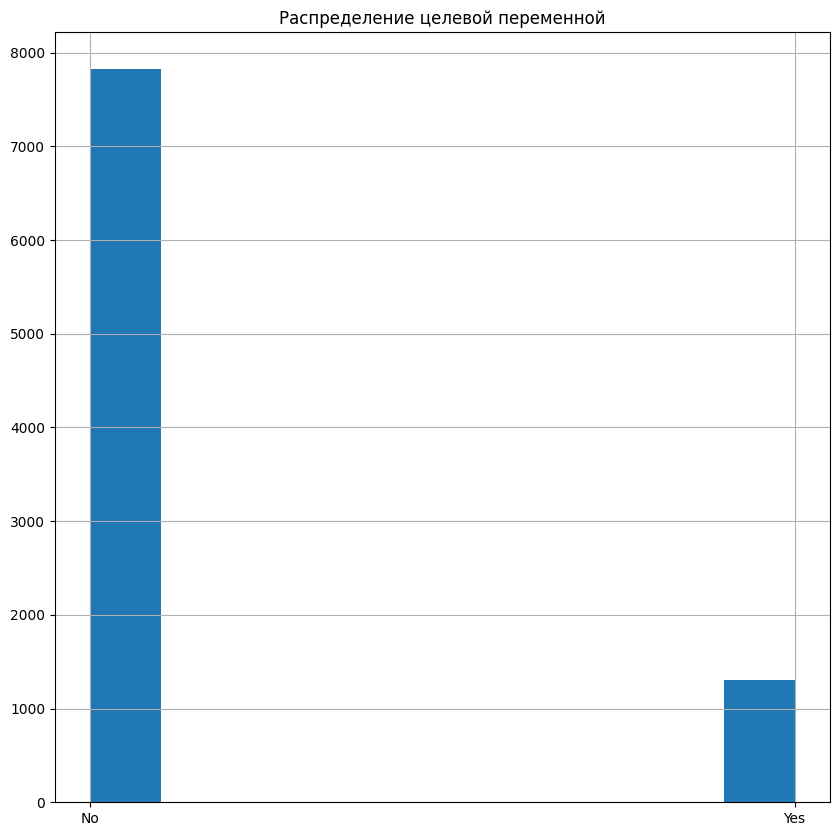

In [ ]:
plt.figure(figsize = (10, 10))
plt.title('Распределение целевой переменной')
train_data['Response'].hist()

plt.show()

ValueError: could not convert string to float: 'BU79786'

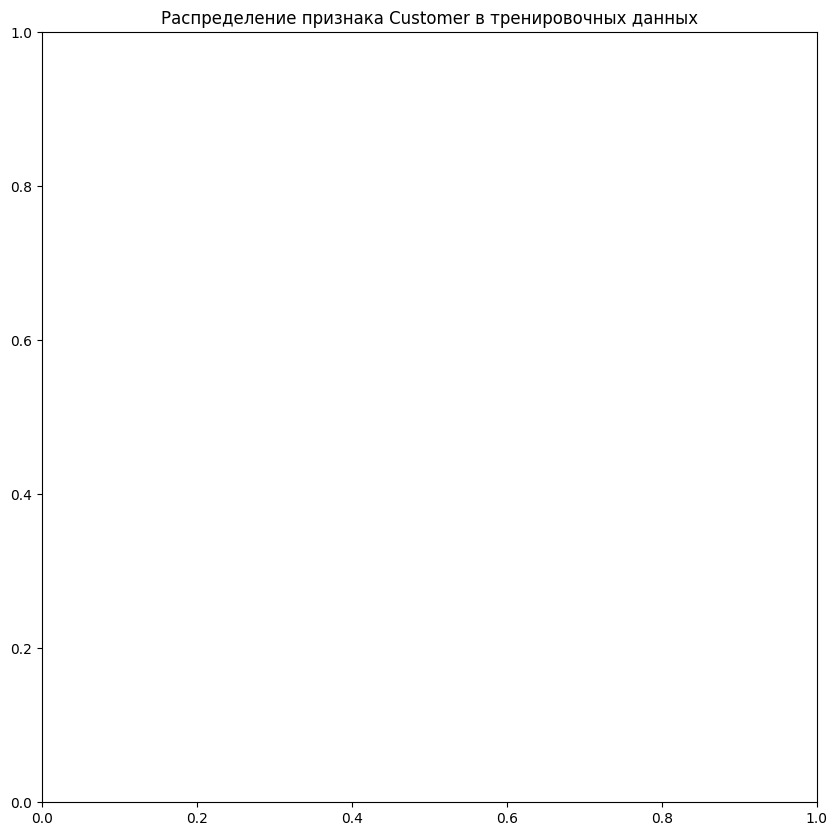

In [ ]:
for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(train_data[col])

In [ ]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    train_data[col].hist()

## Сравнение ушедших с оставшимися

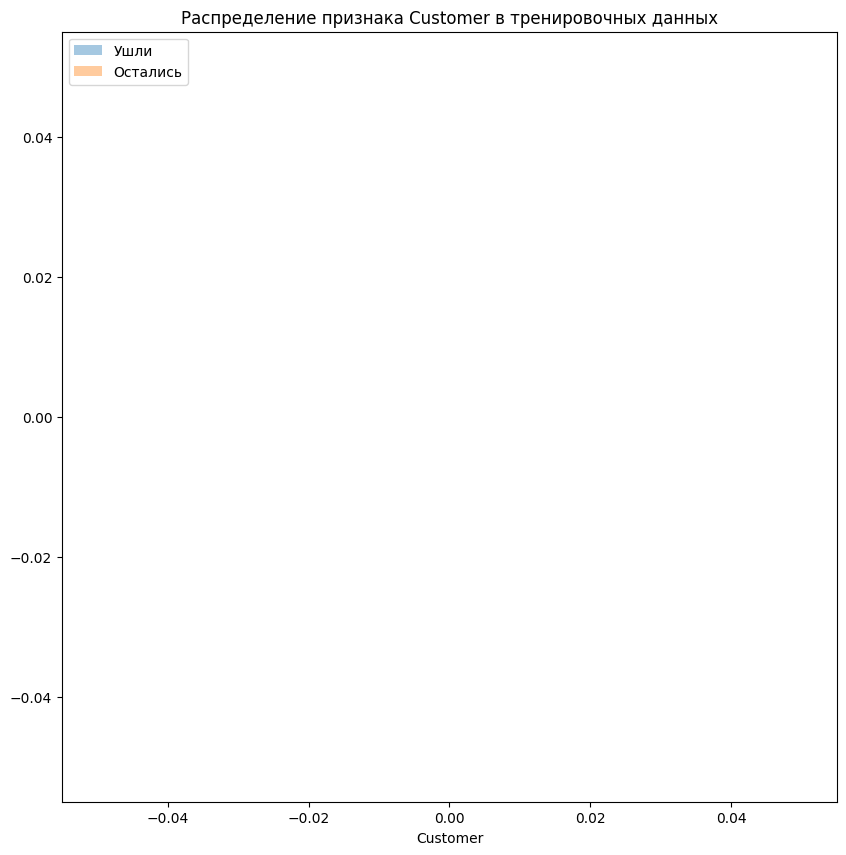

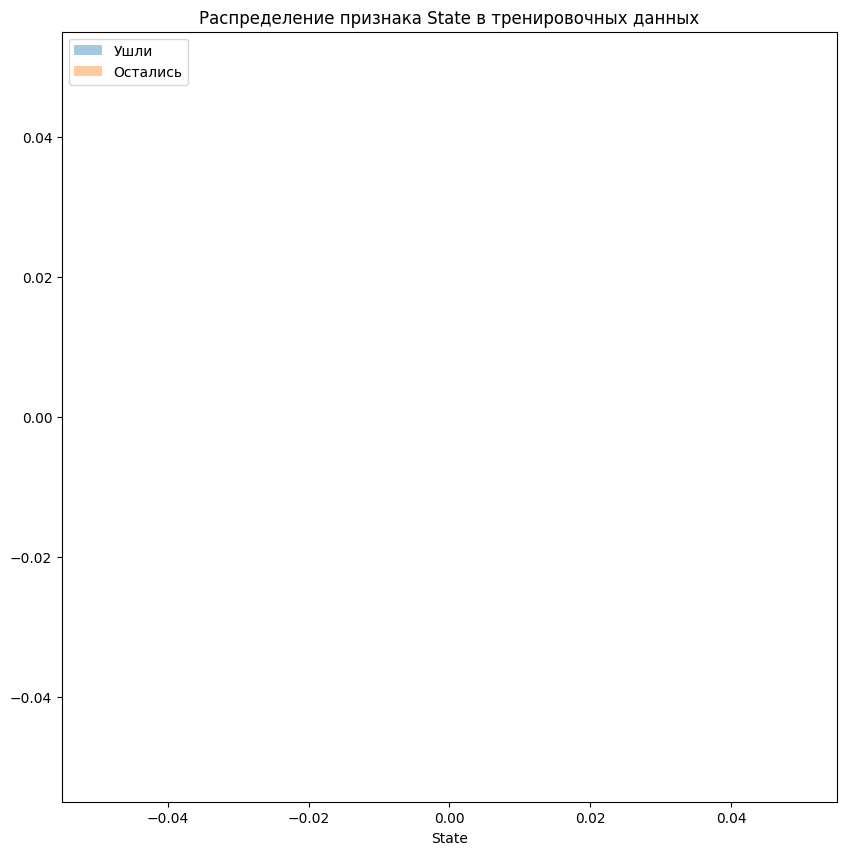

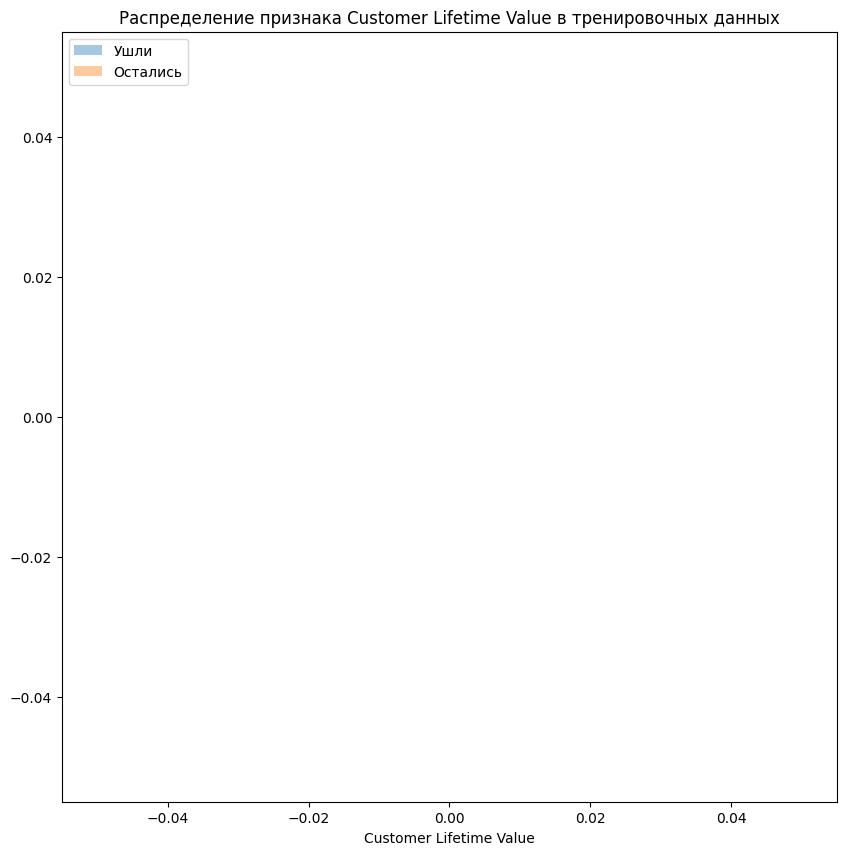

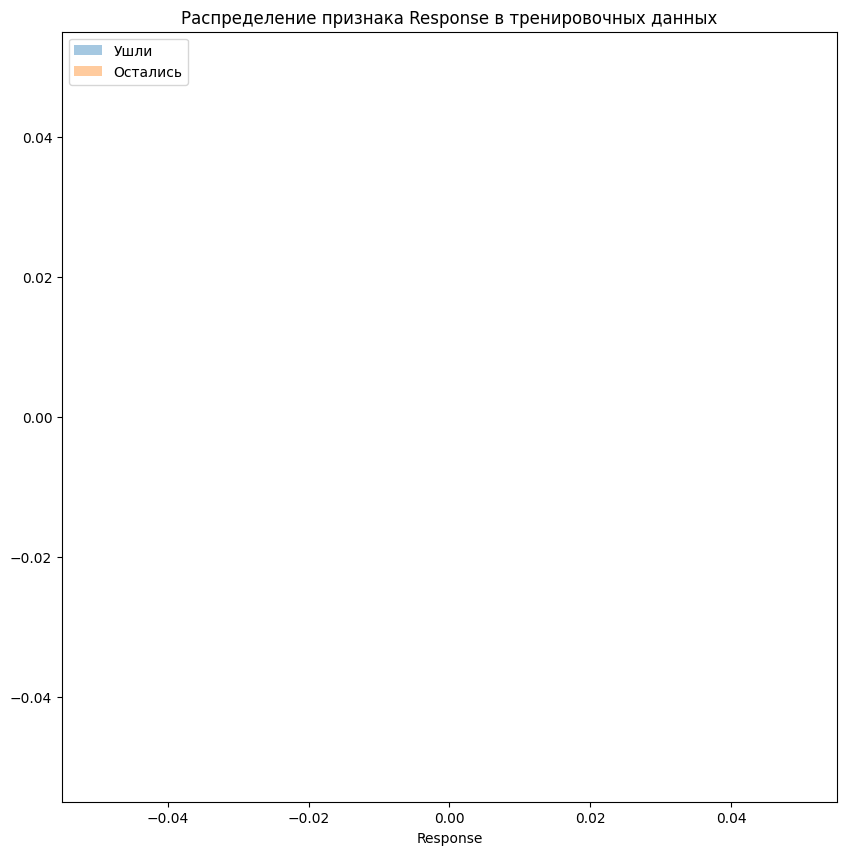

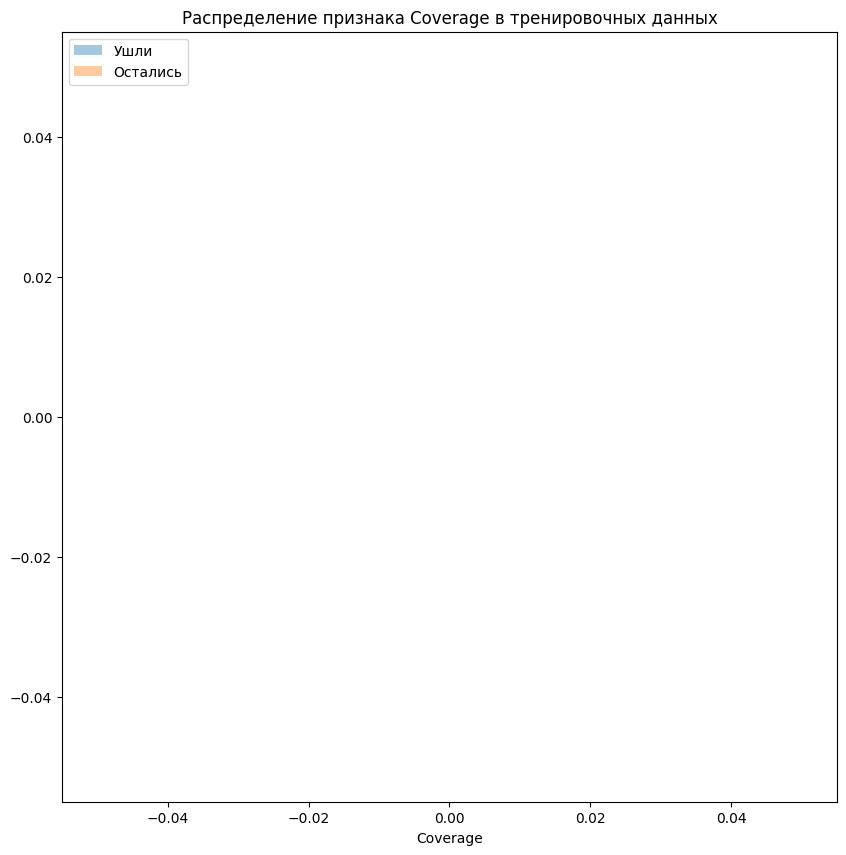

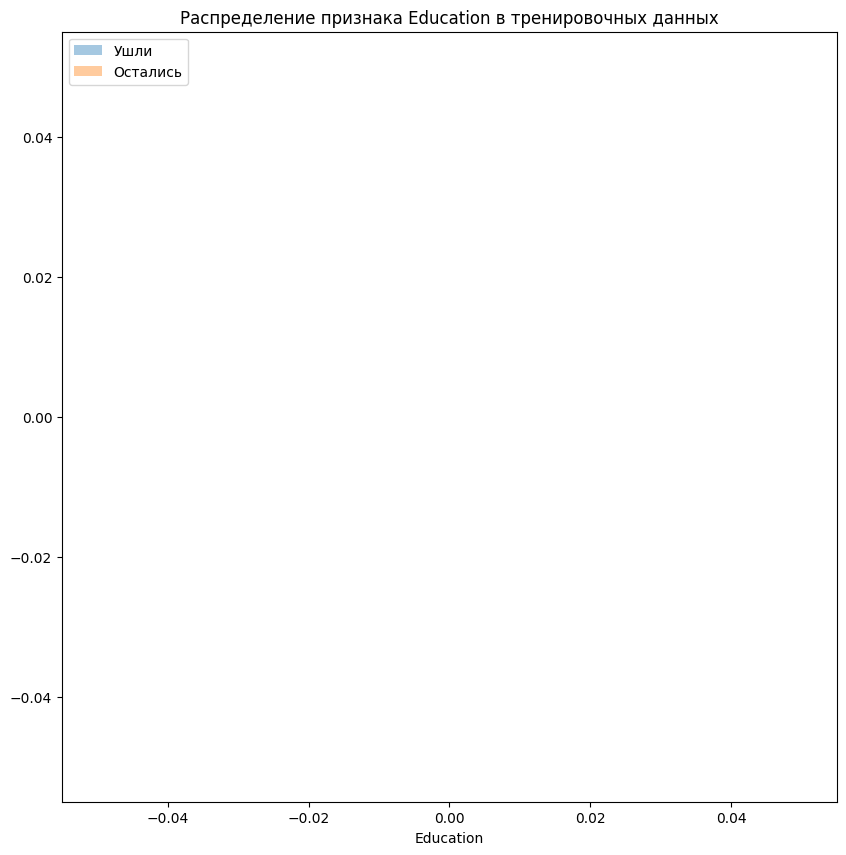

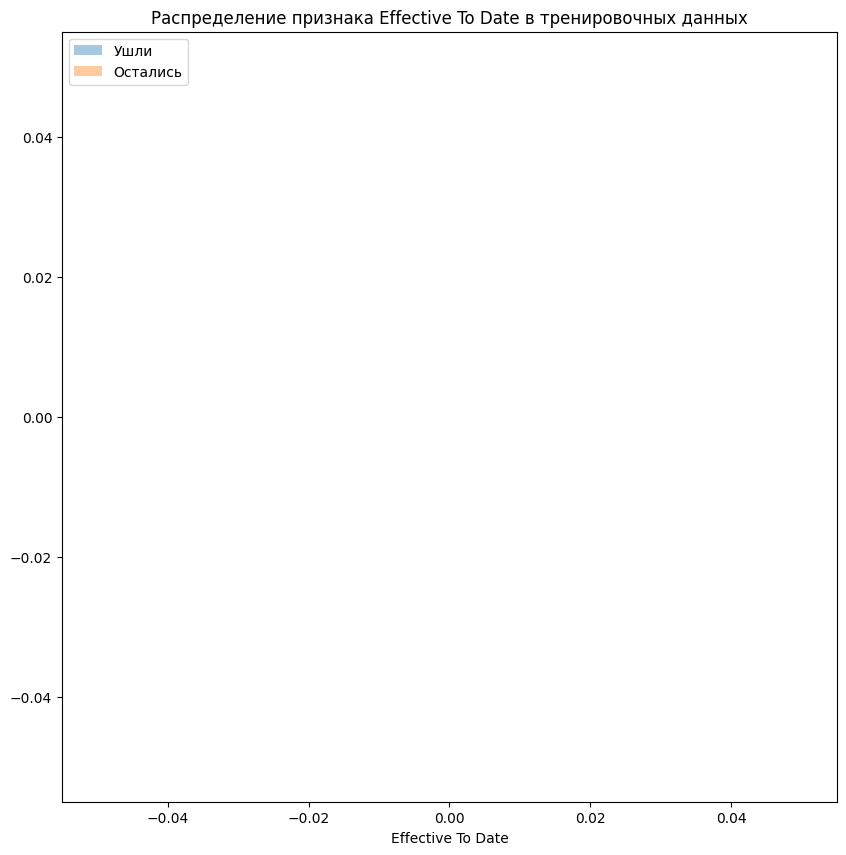

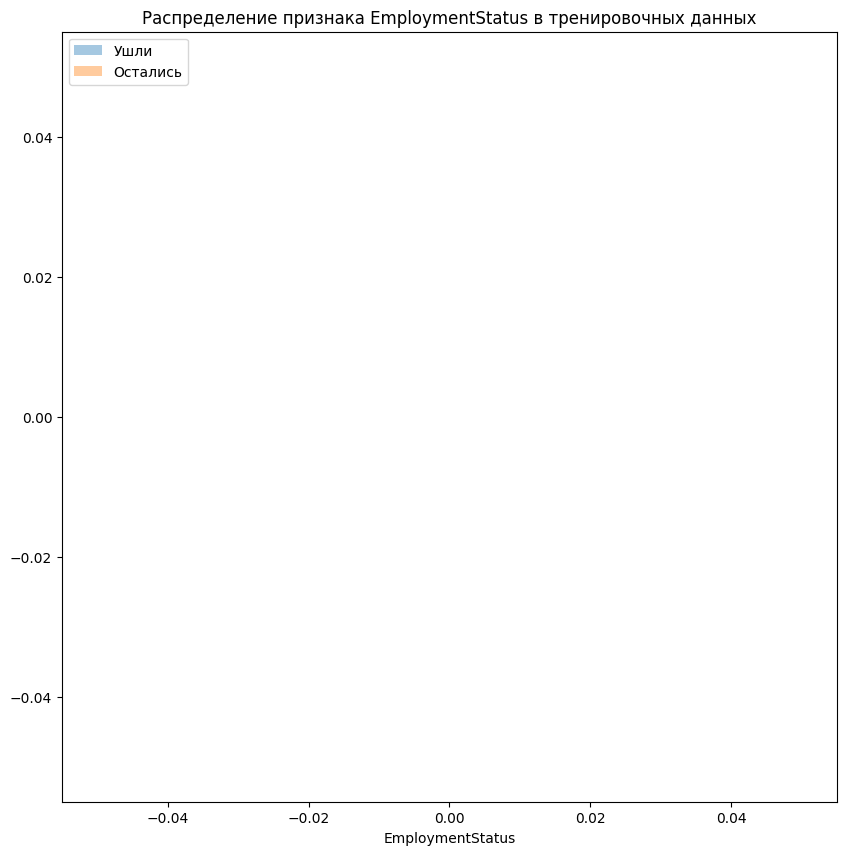

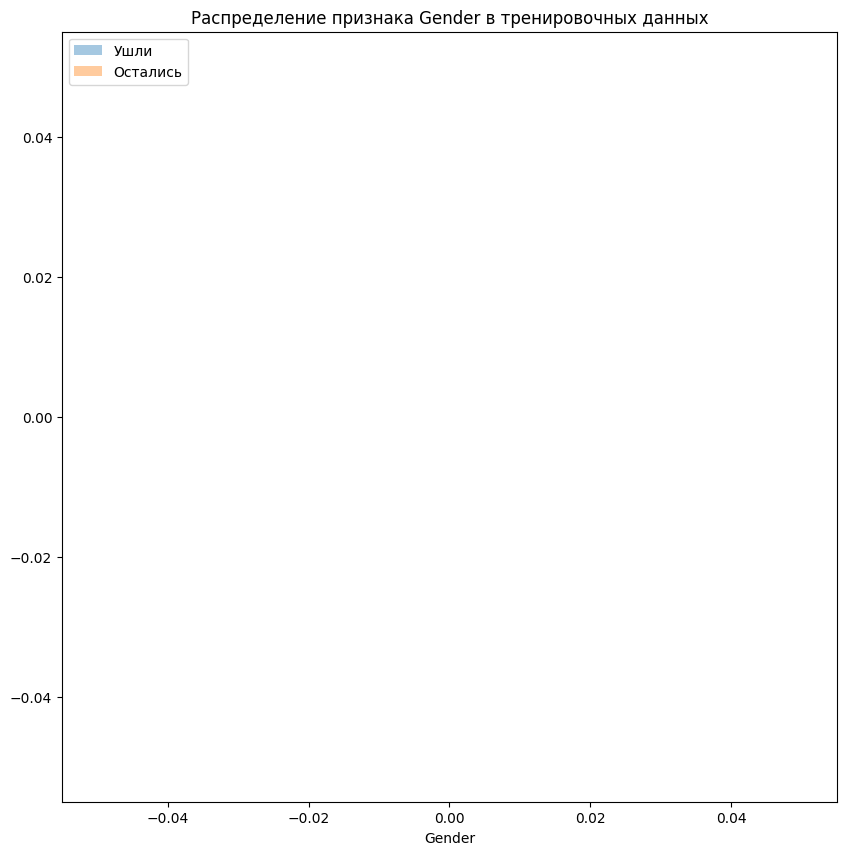

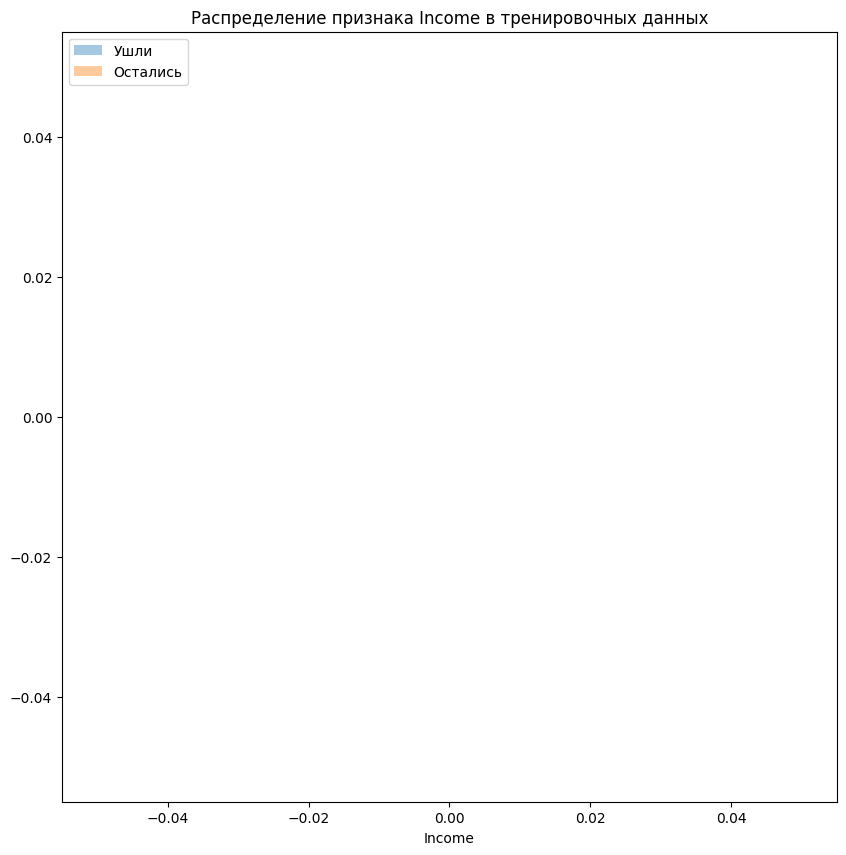

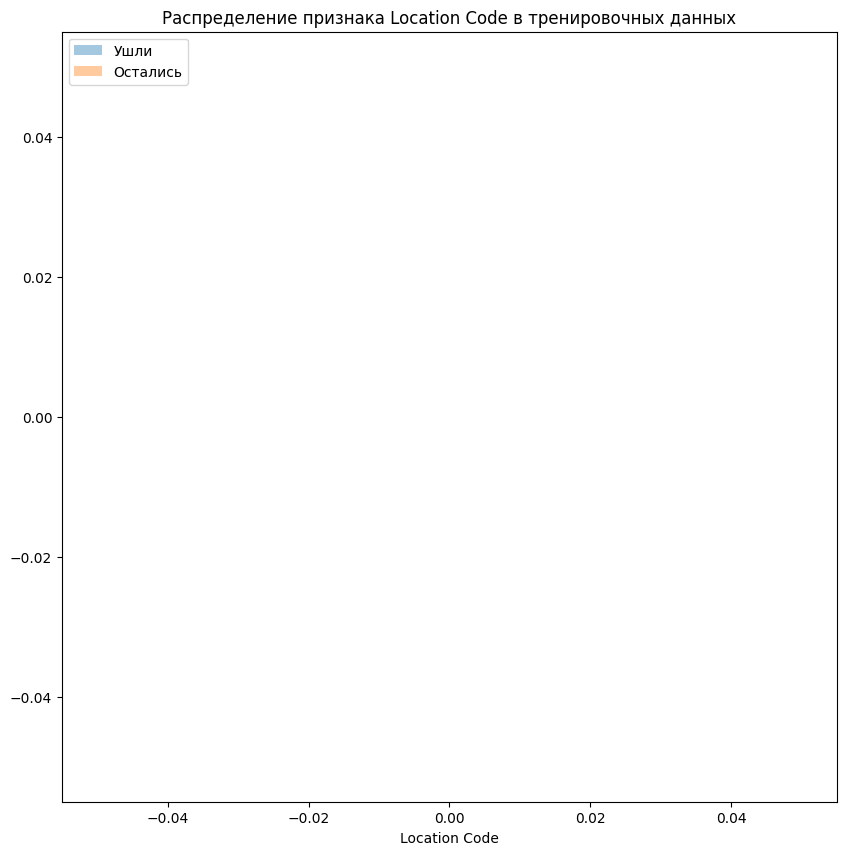

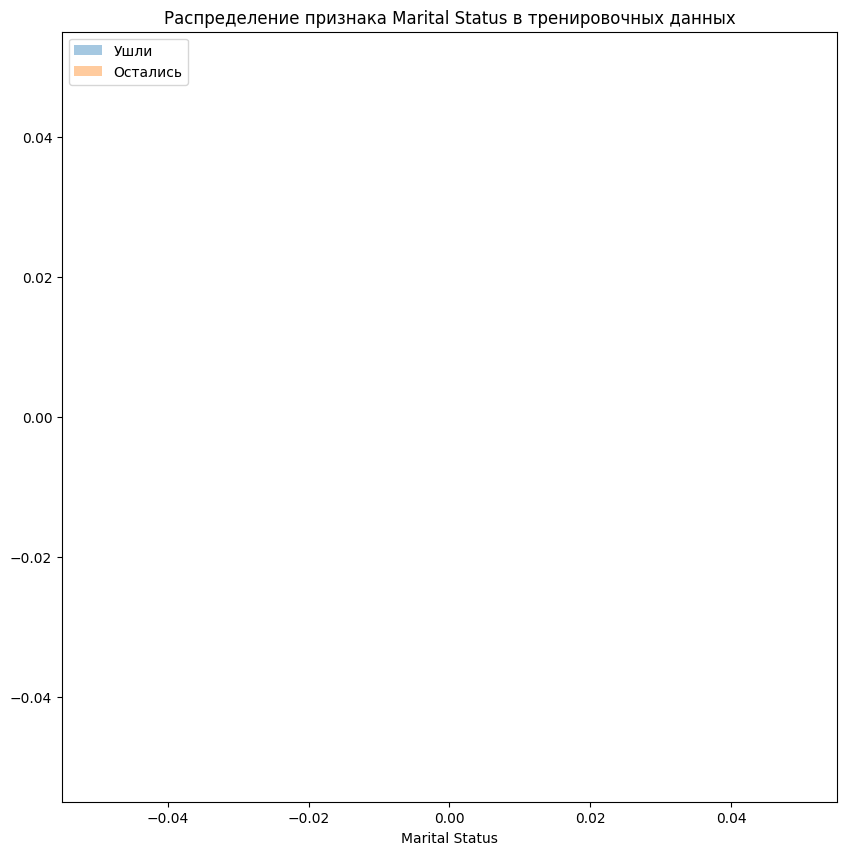

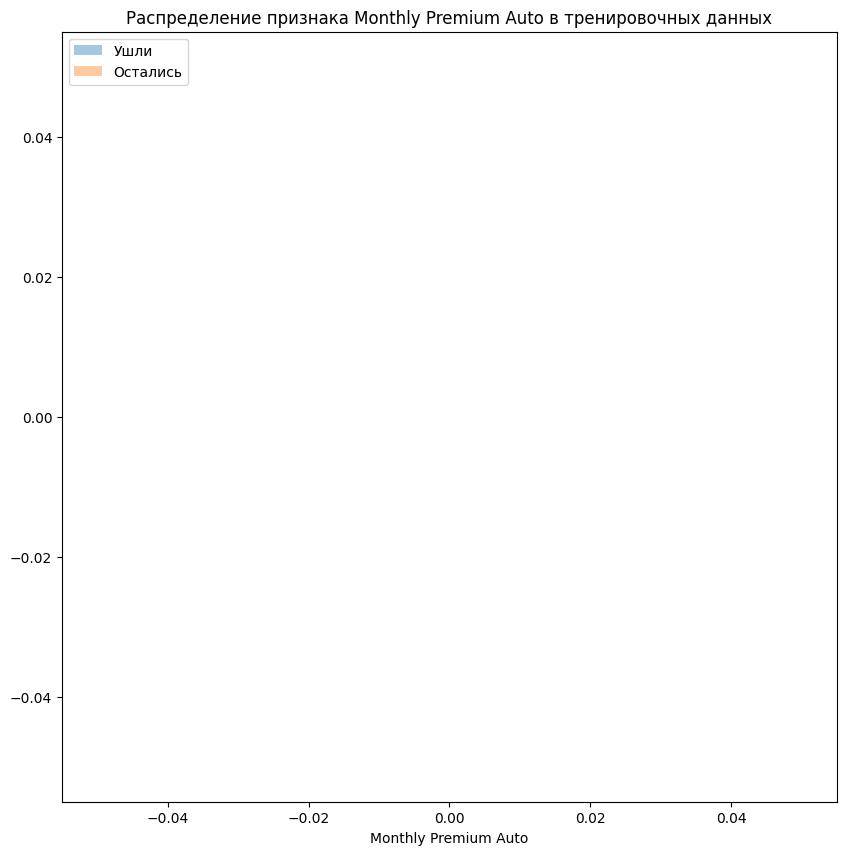

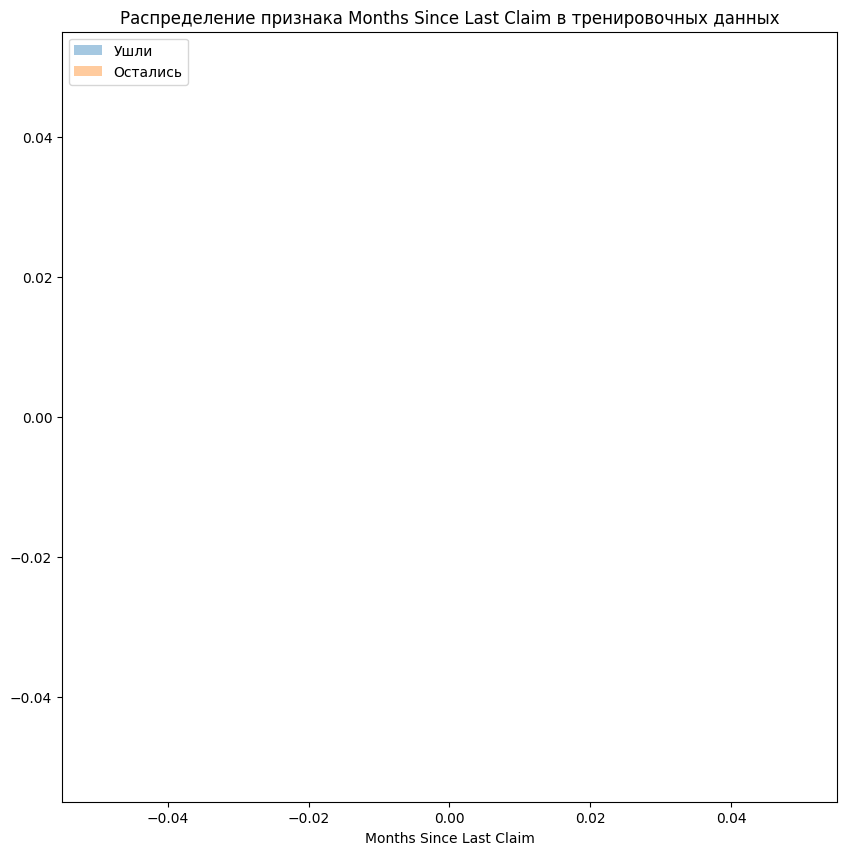

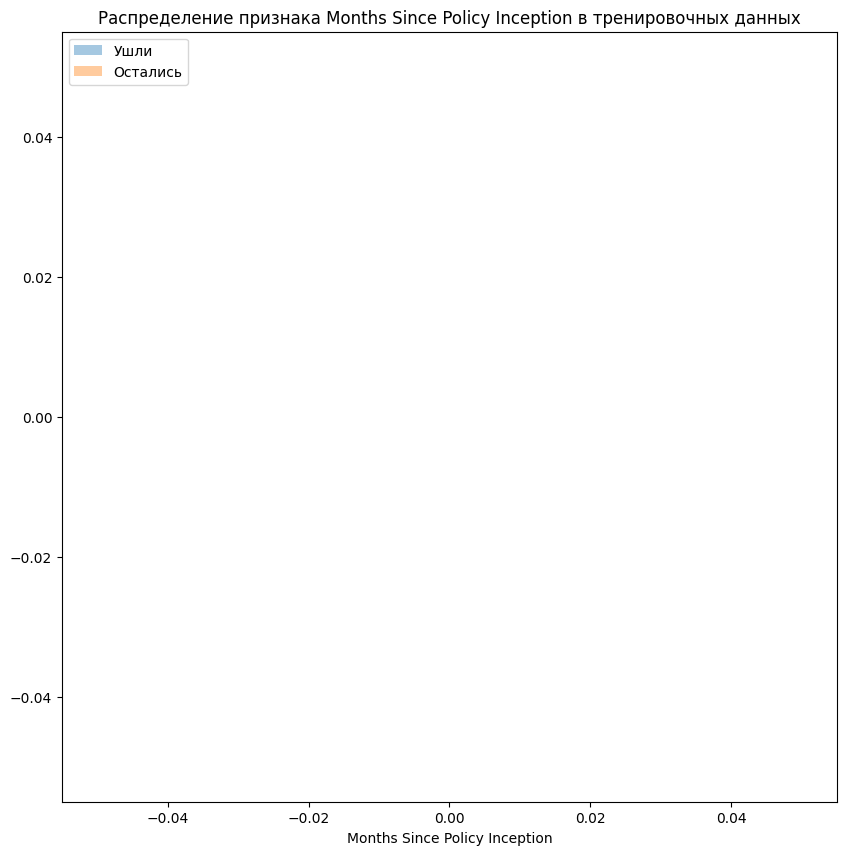

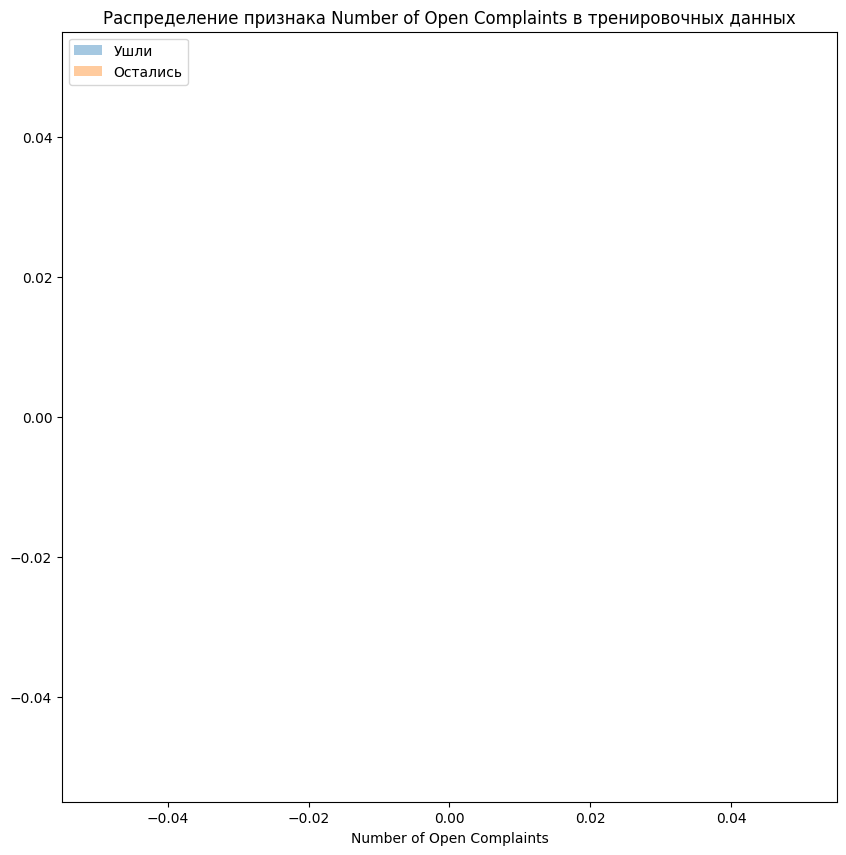

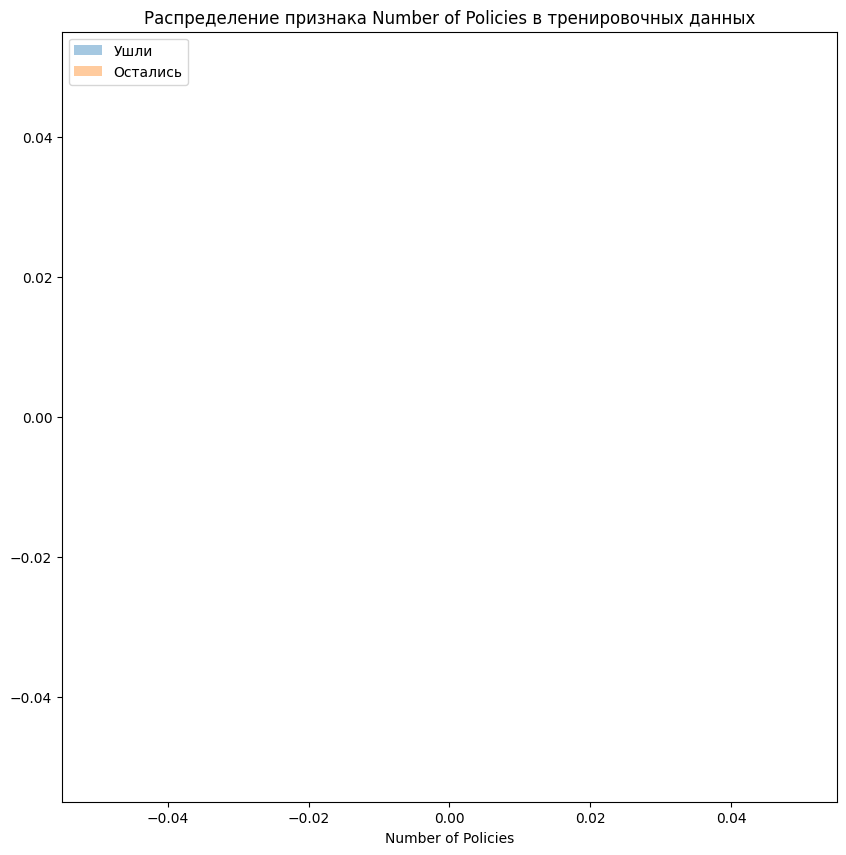

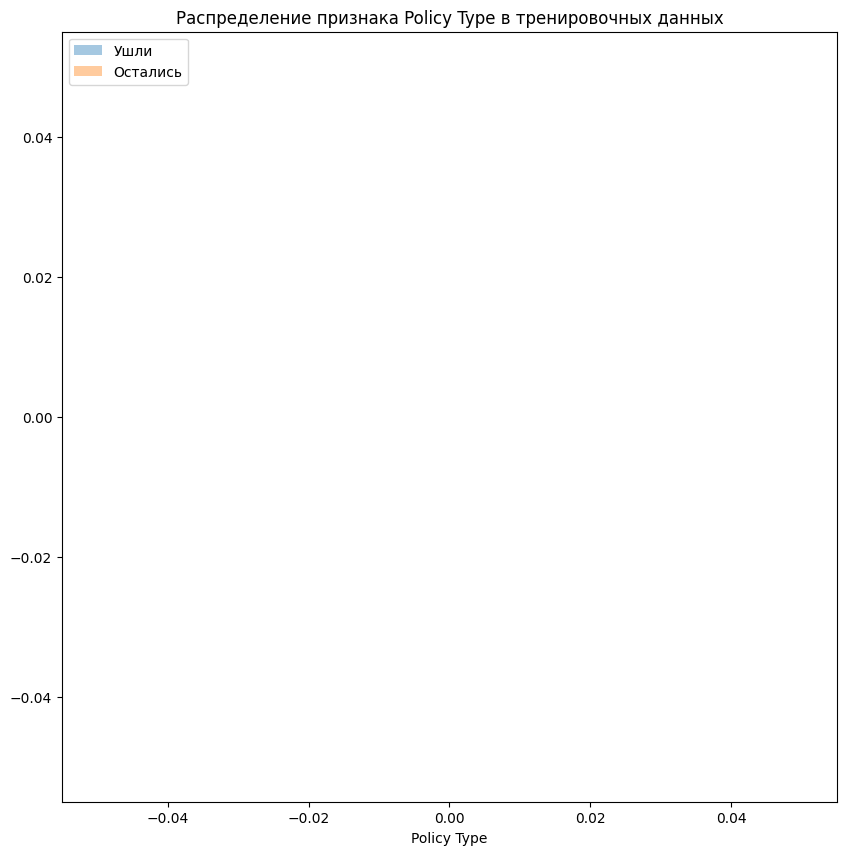

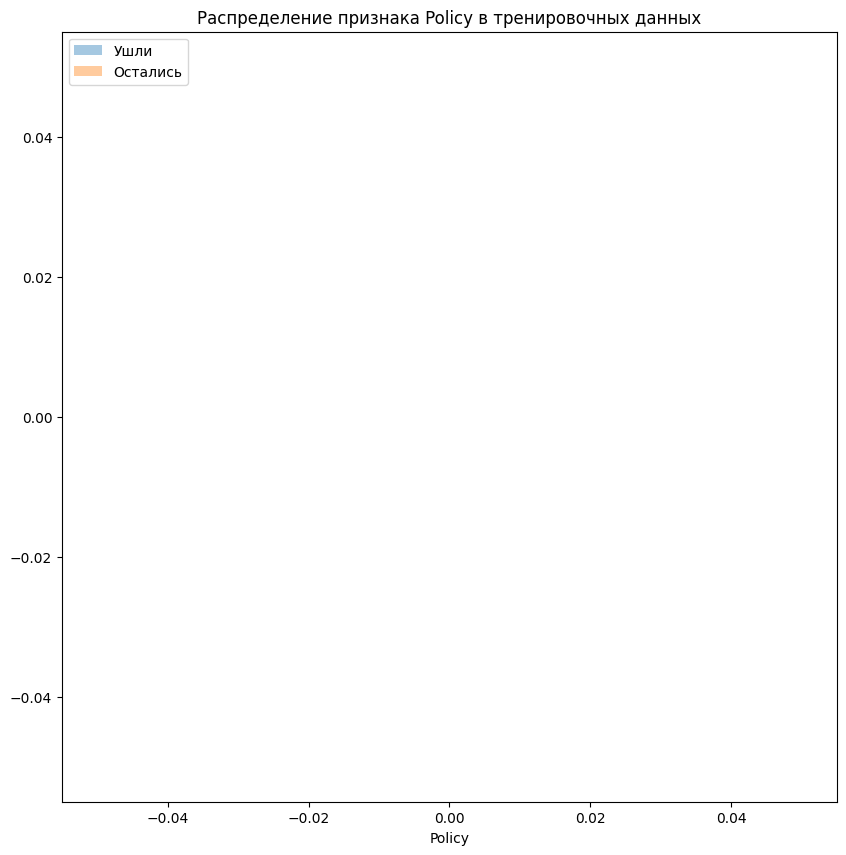

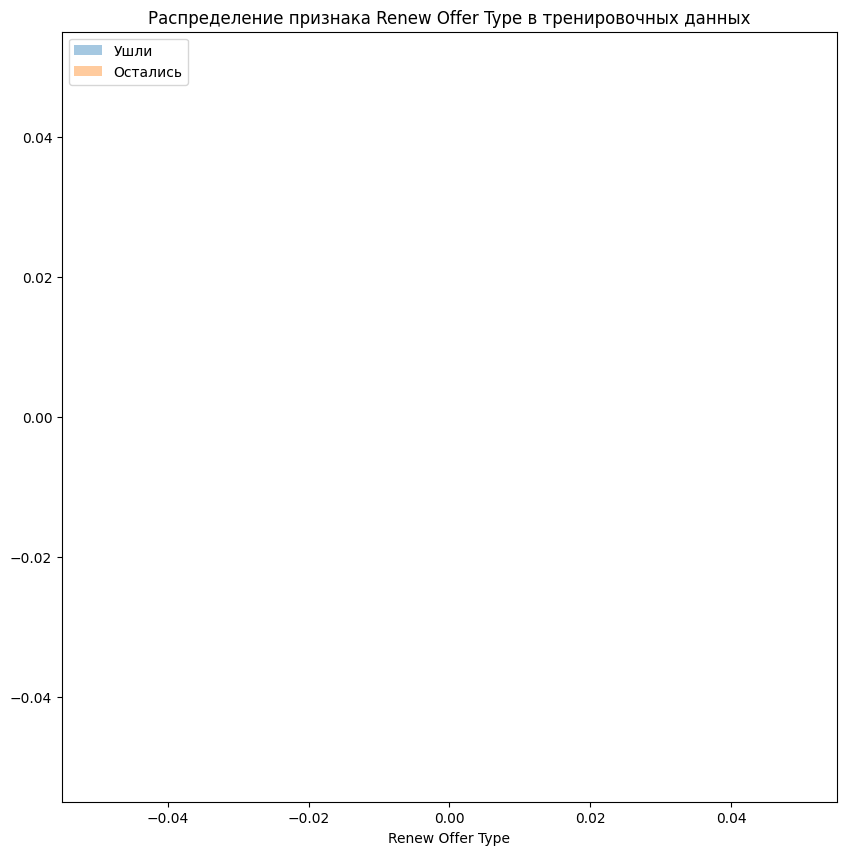

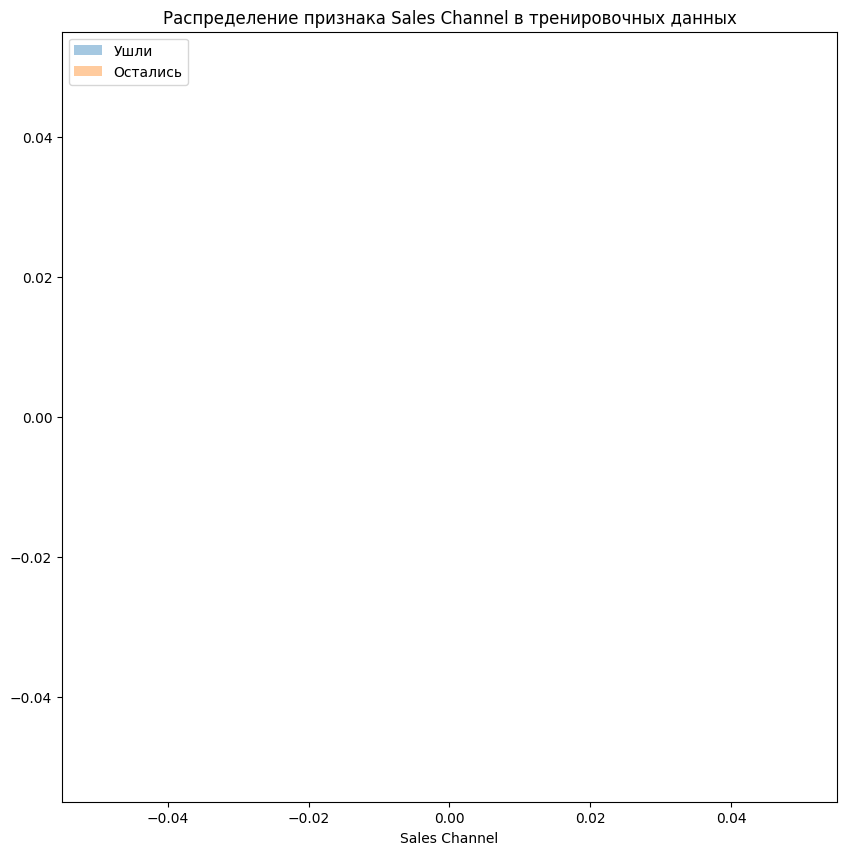

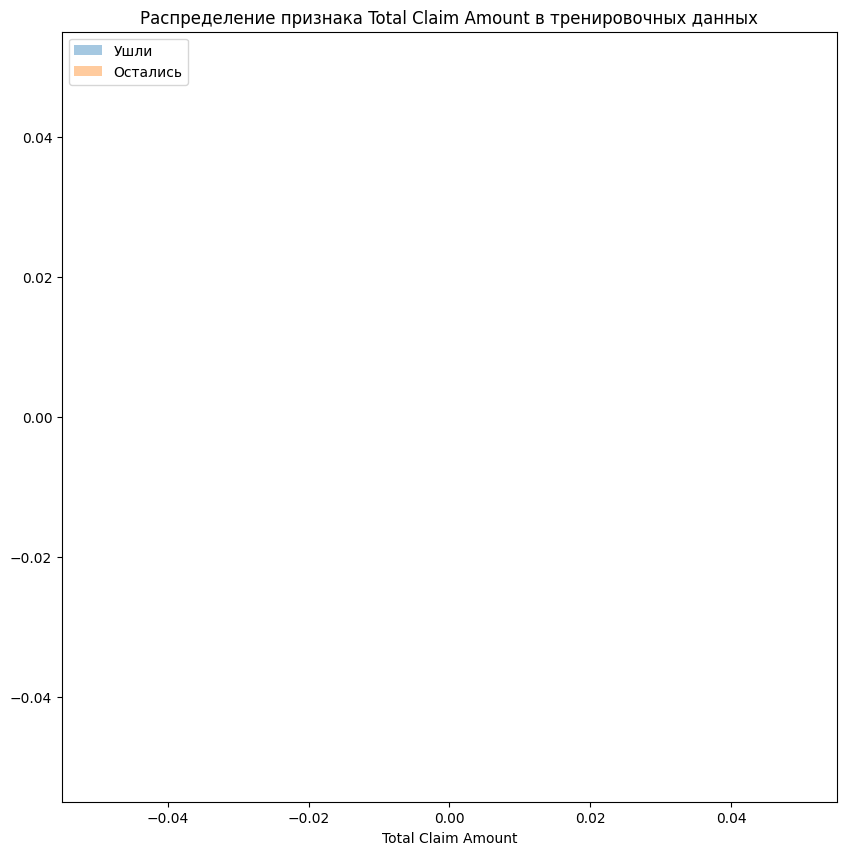

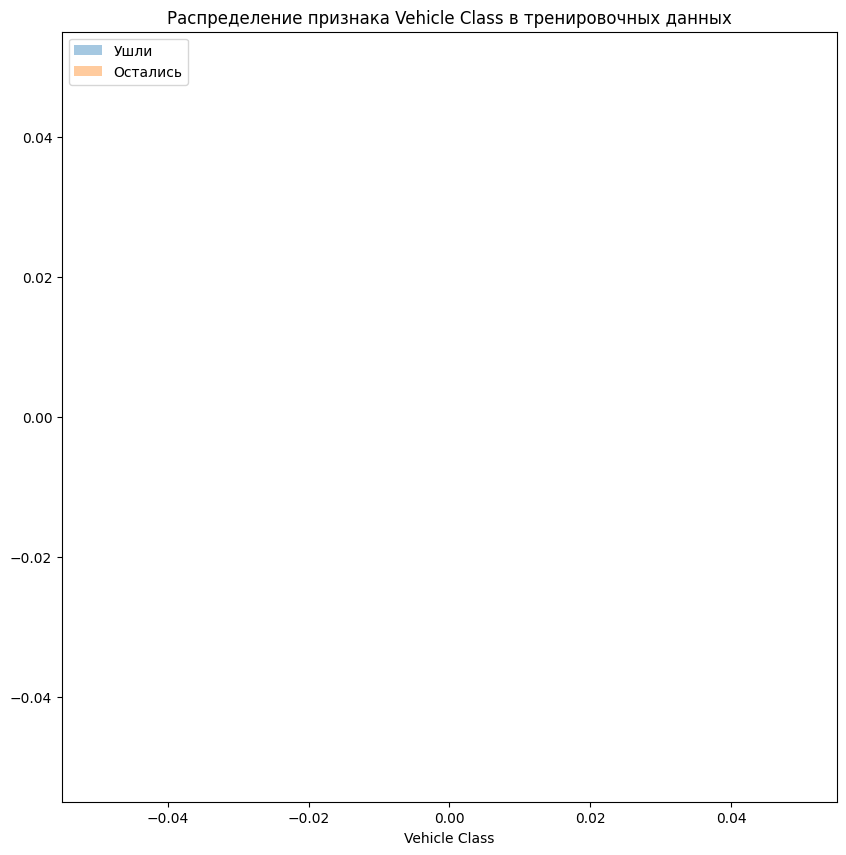

In [ ]:
response = train_data[train_data['Response'] == 'yes']
not_response = train_data[train_data['Response'] == 'no']


for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(response[col], label = 'Ушли')
    sns.distplot(not_response[col], label = 'Остались')
    plt.legend()

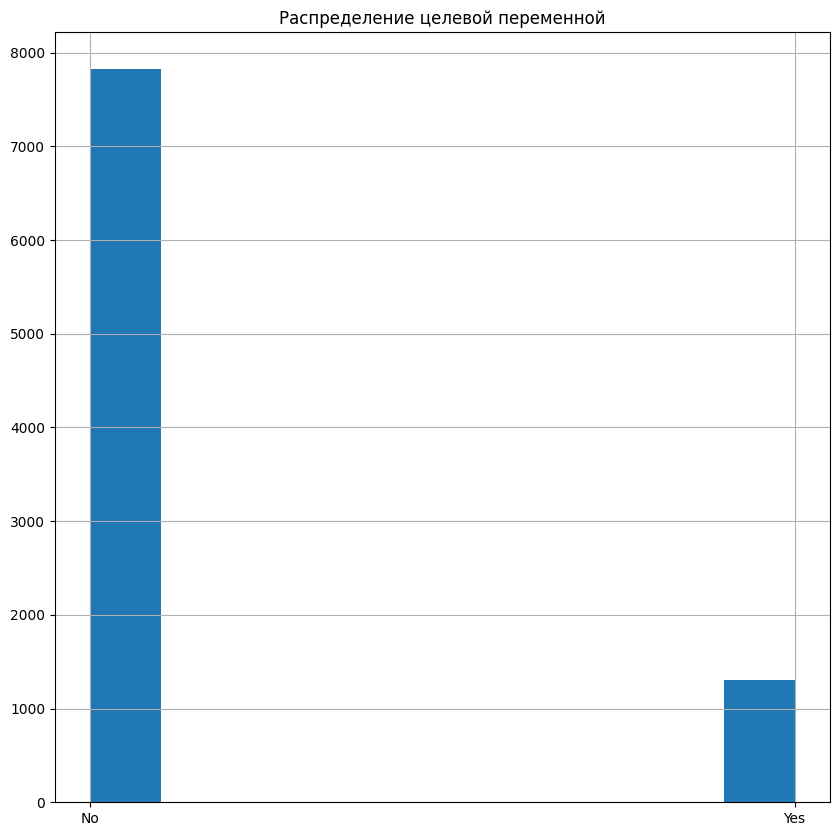

In [ ]:
plt.figure(figsize = (10, 10))
plt.title('Распределение целевой переменной')
train_data['Response'].hist()

plt.show()

ValueError: could not convert string to float: 'BU79786'

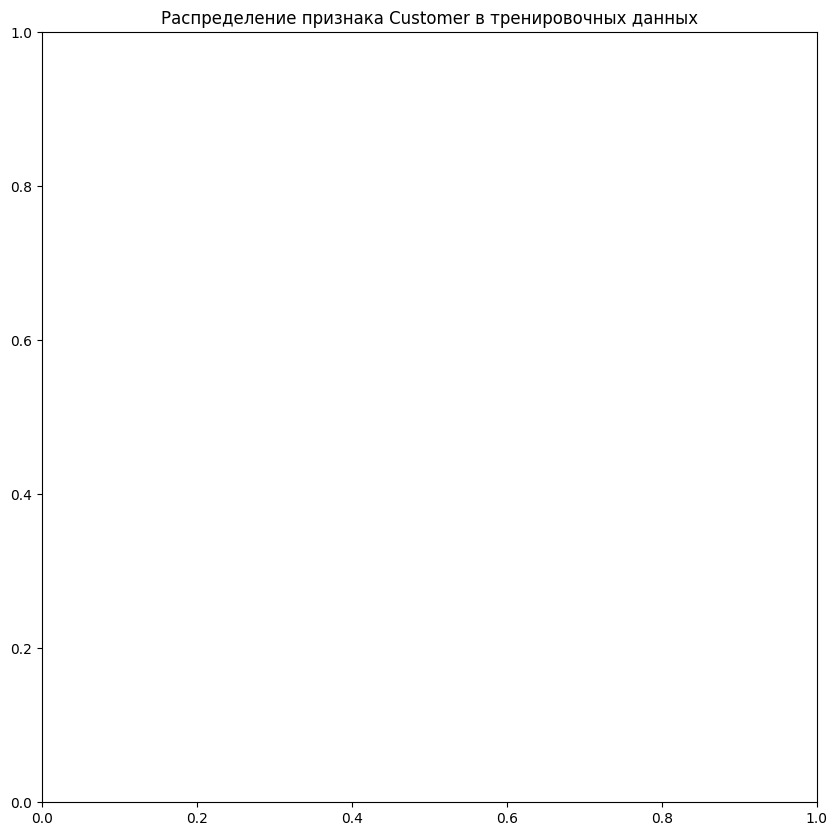

In [ ]:
for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(train_data[col])

In [ ]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    train_data[col].hist()

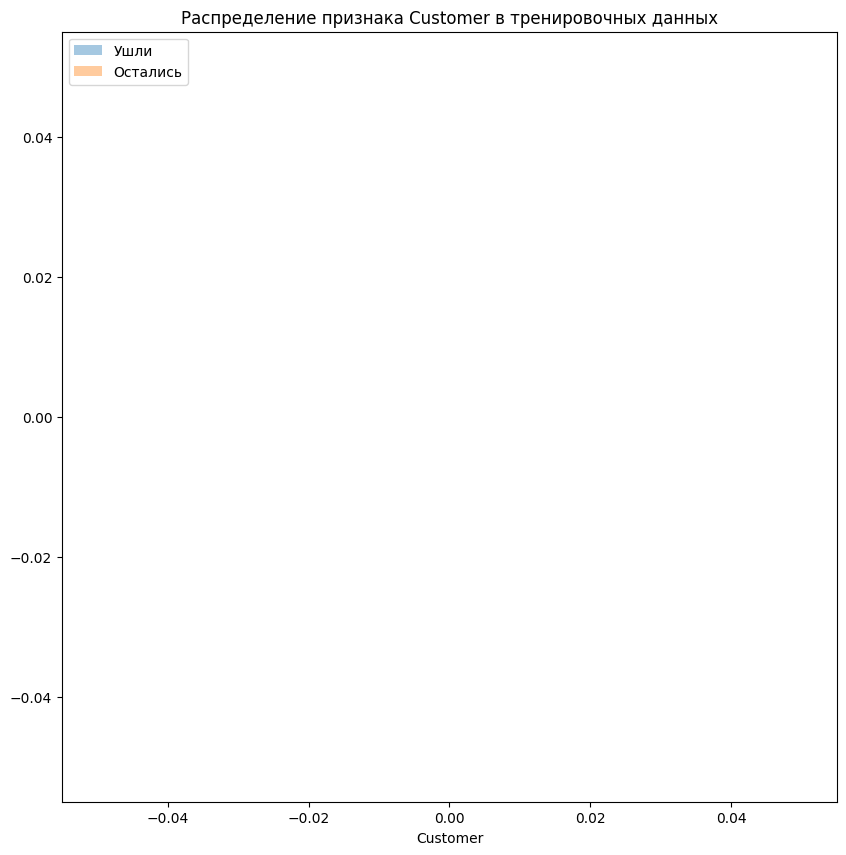

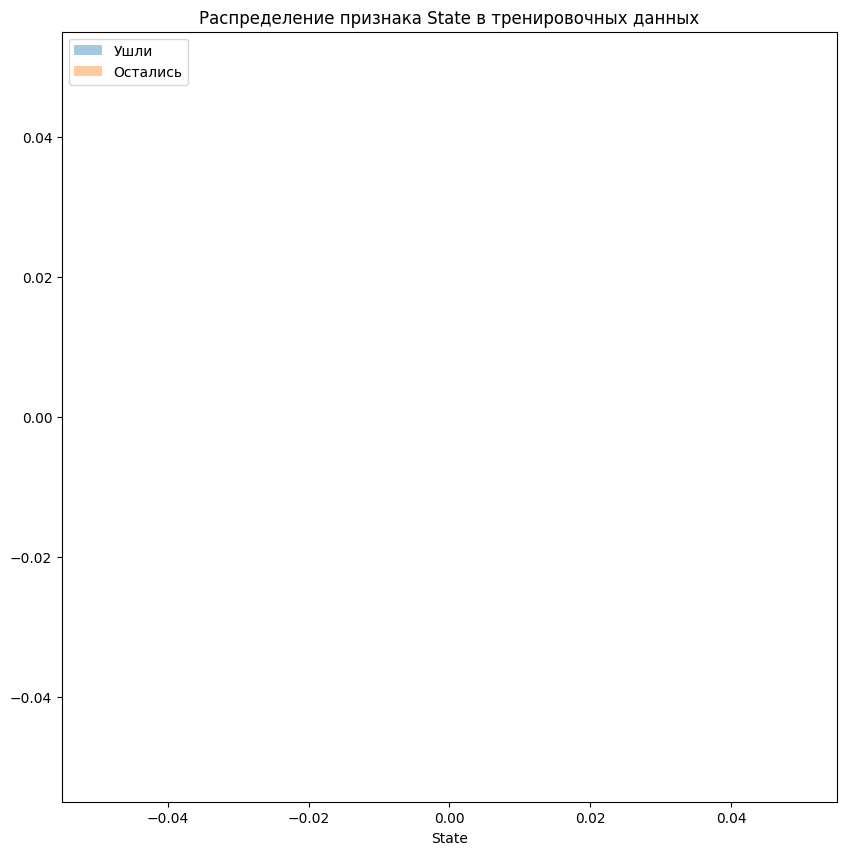

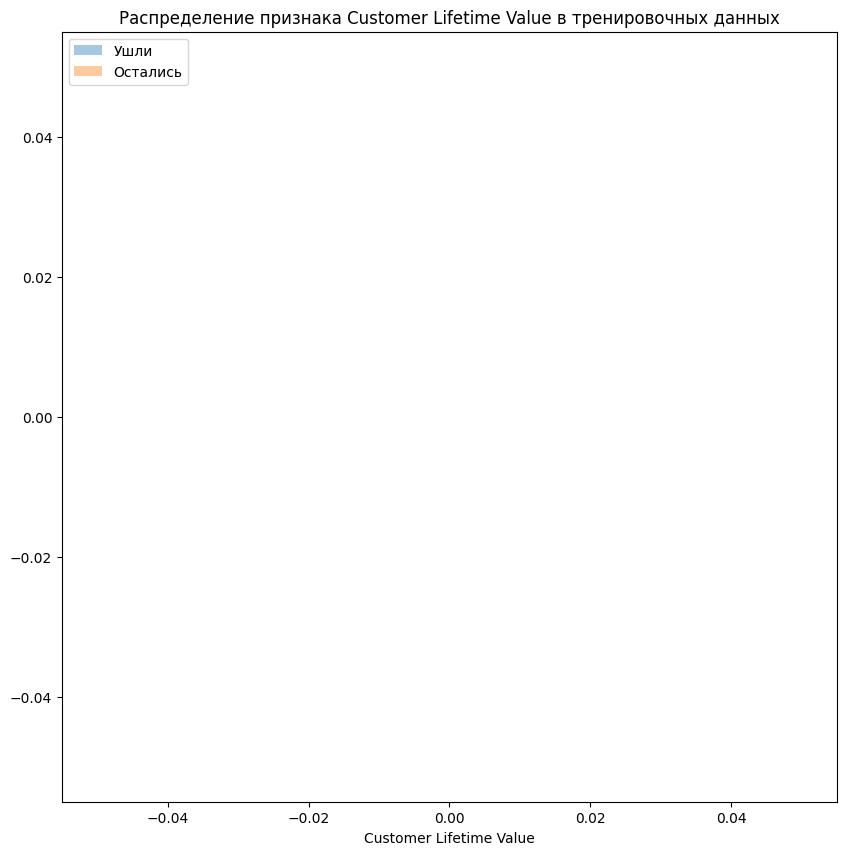

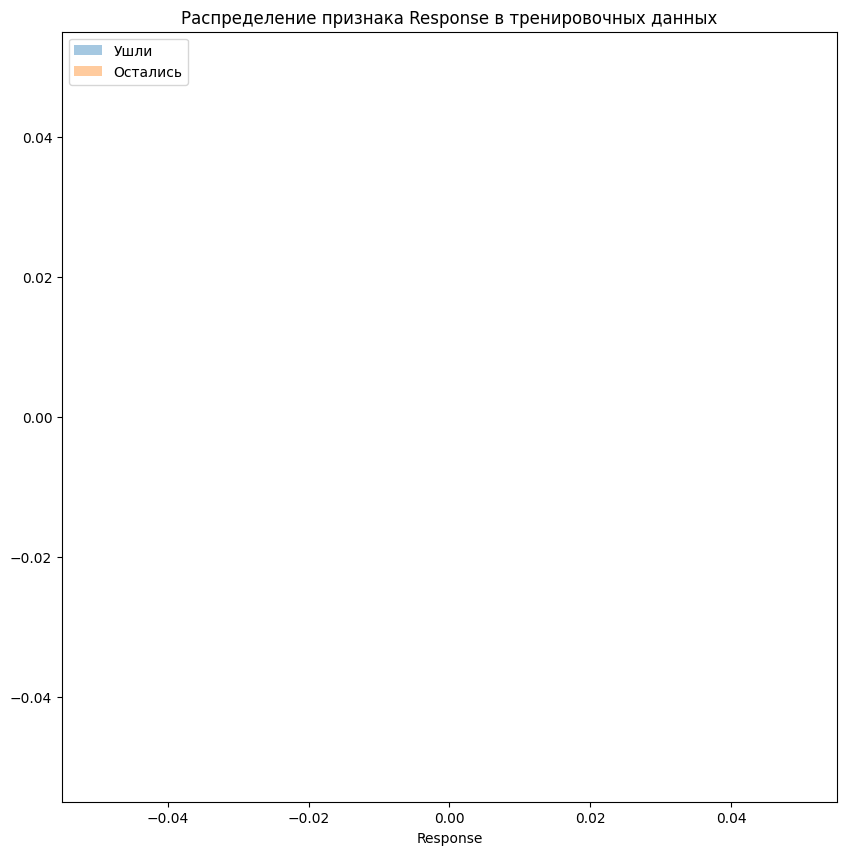

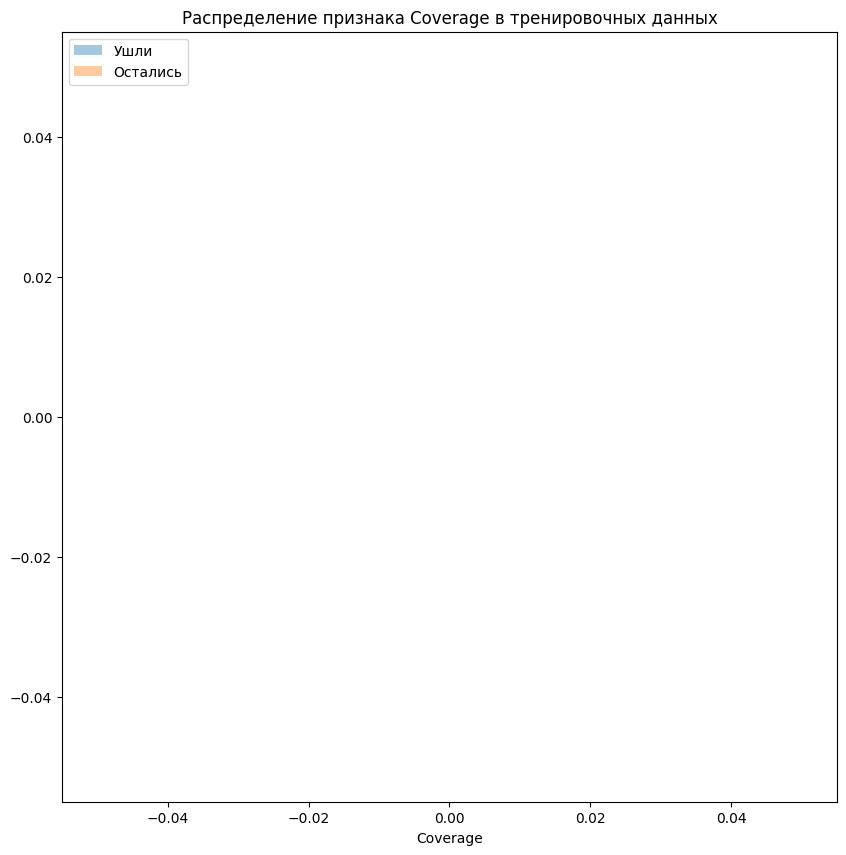

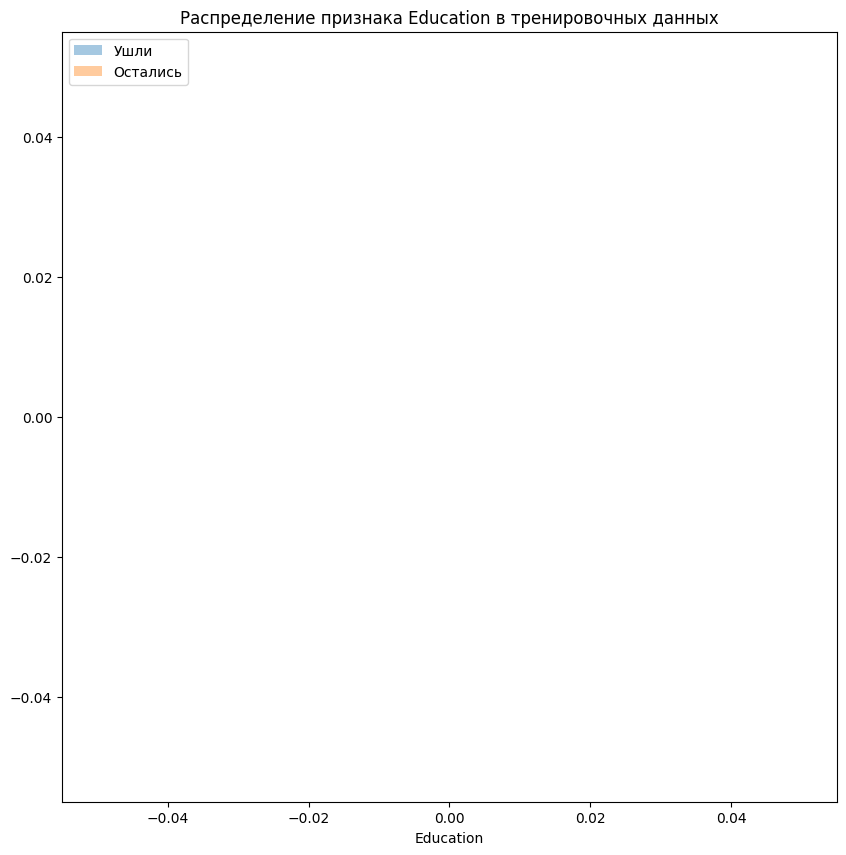

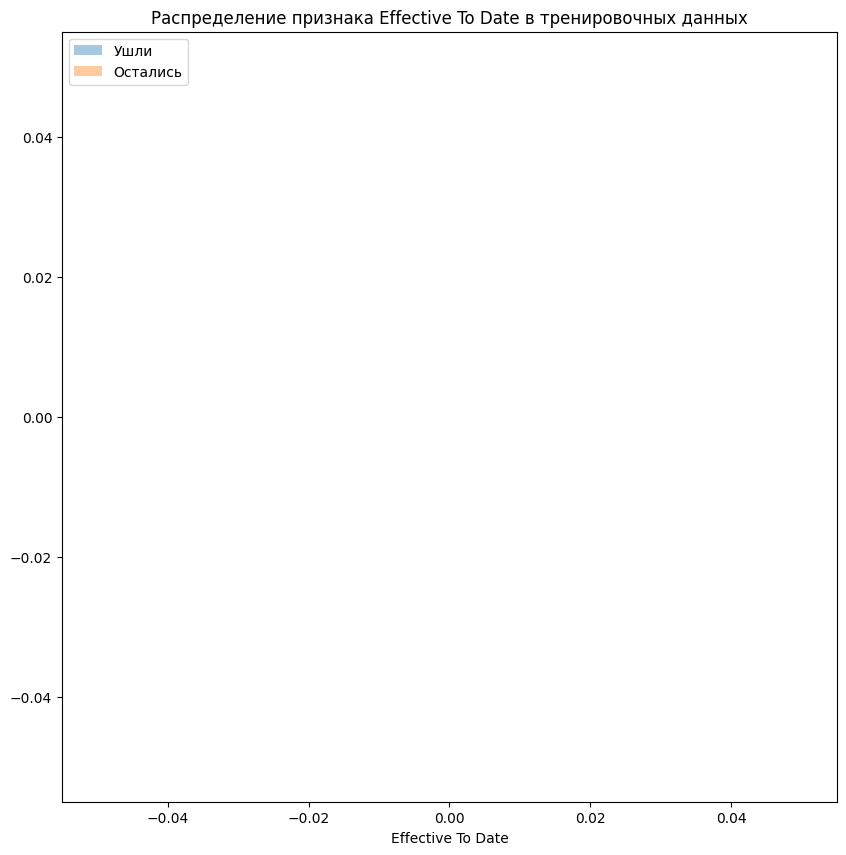

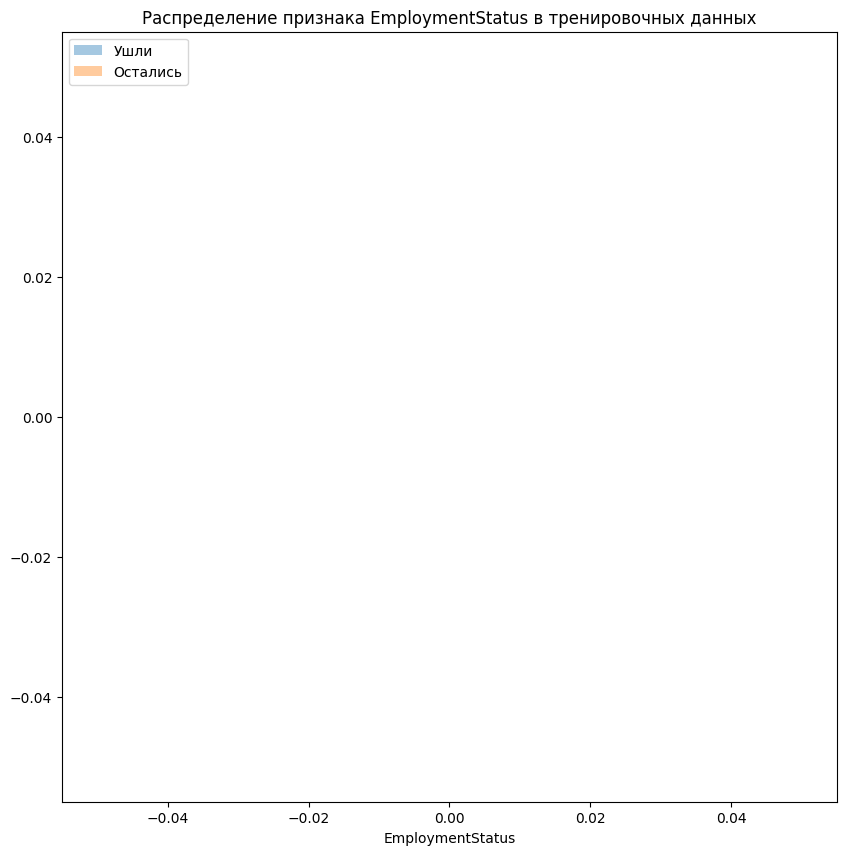

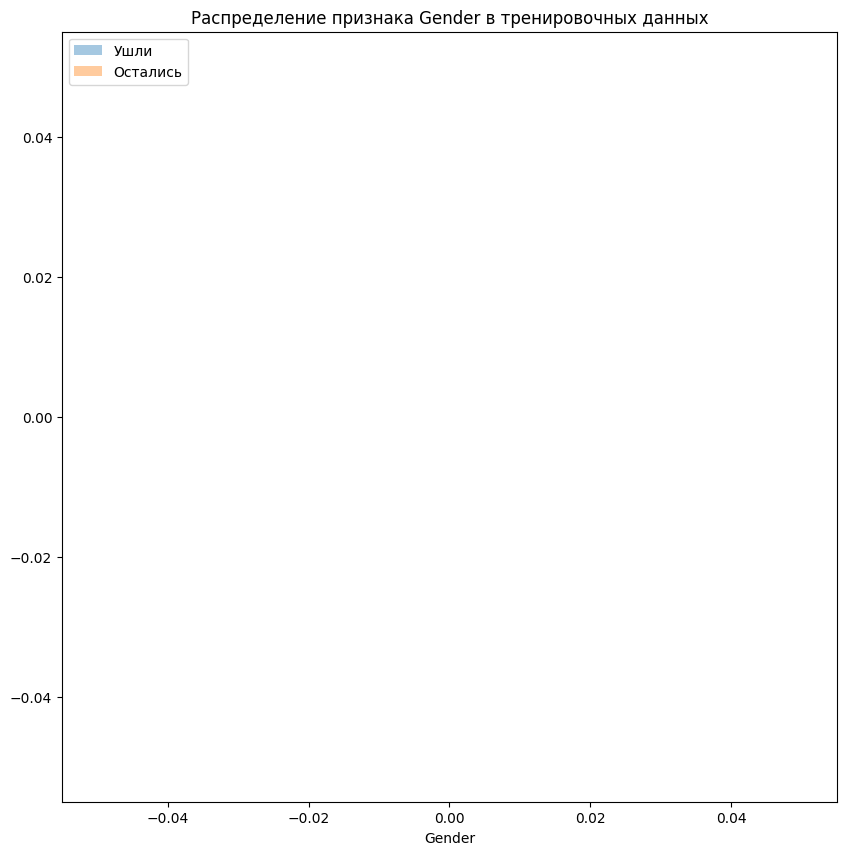

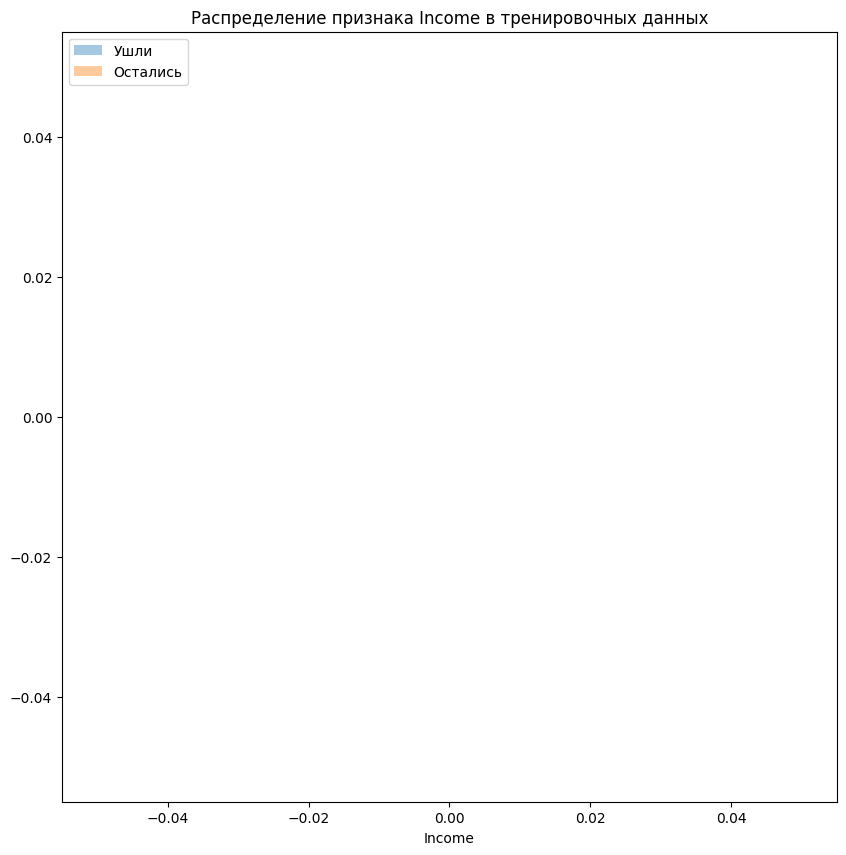

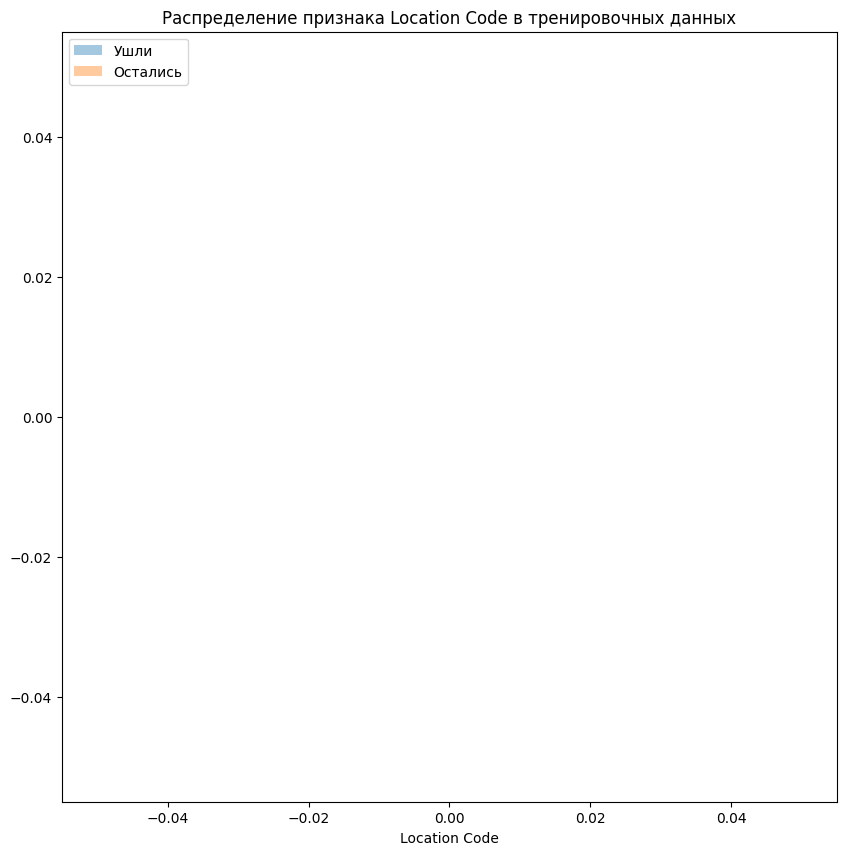

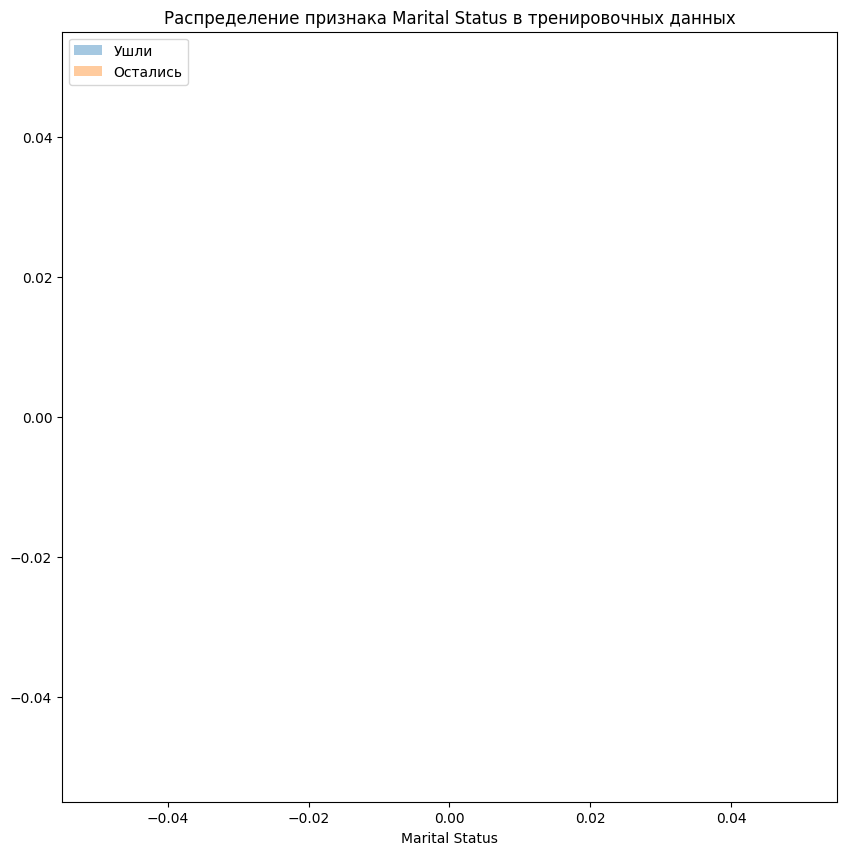

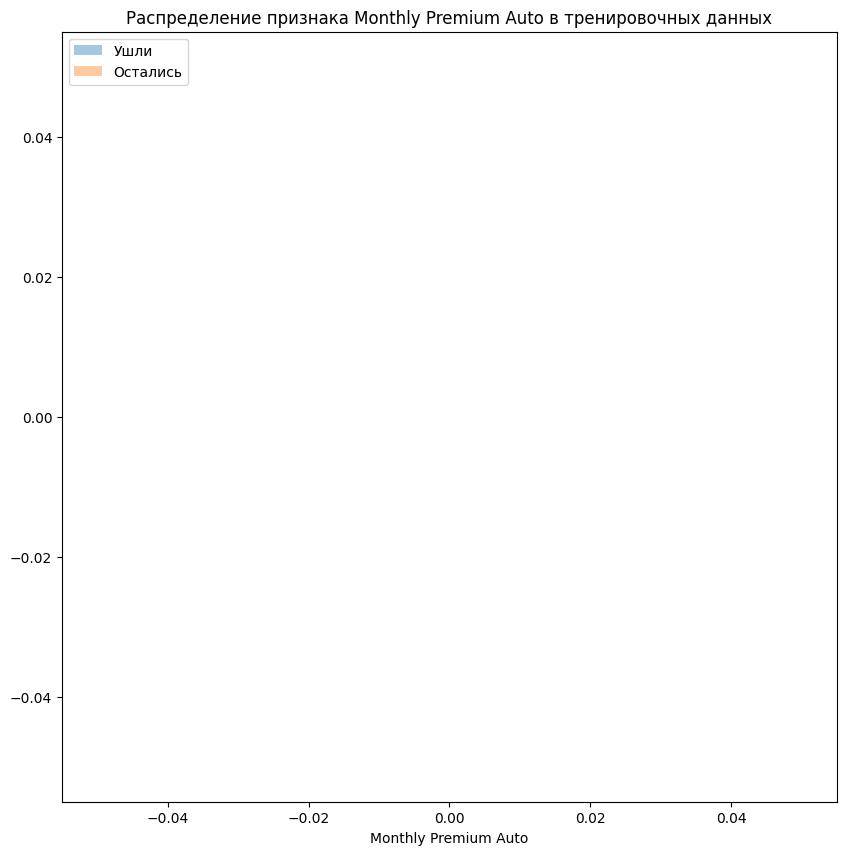

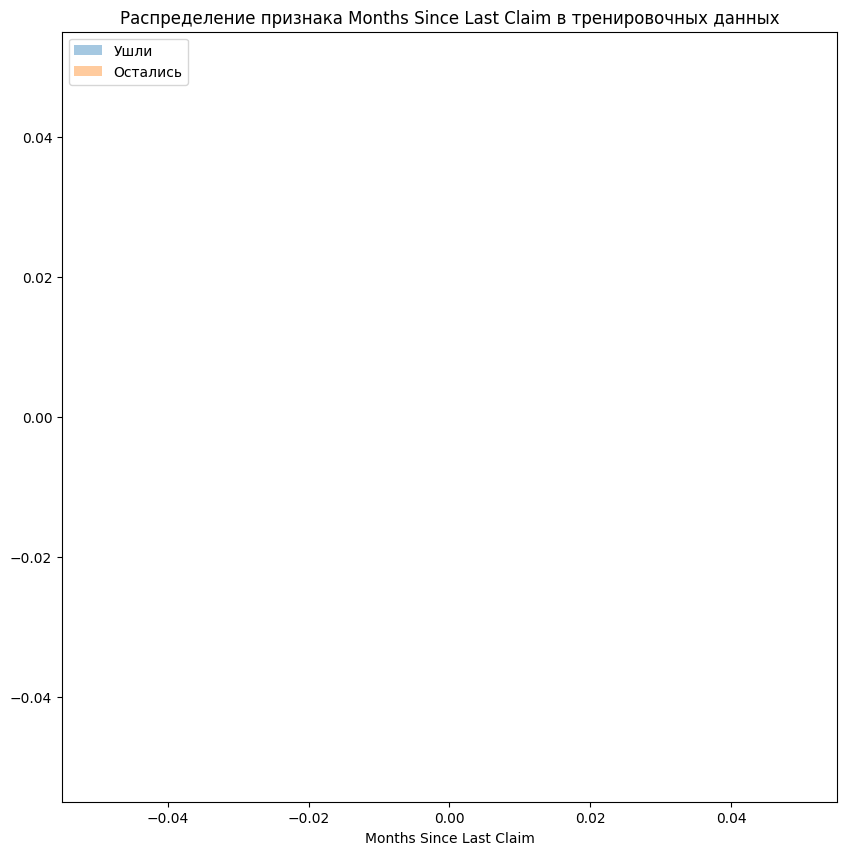

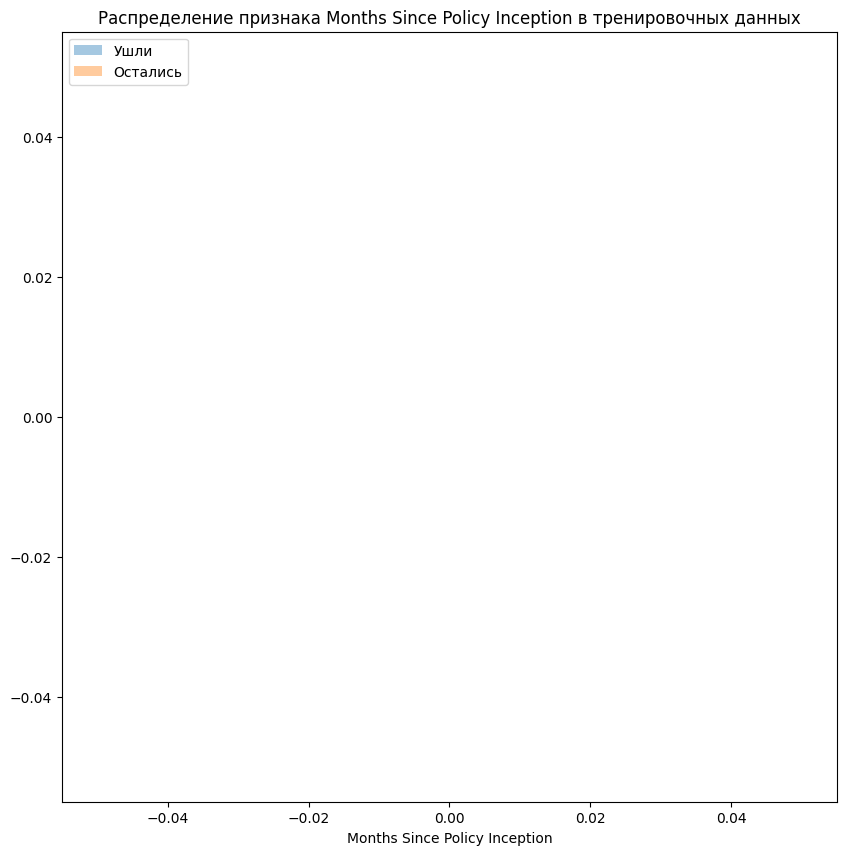

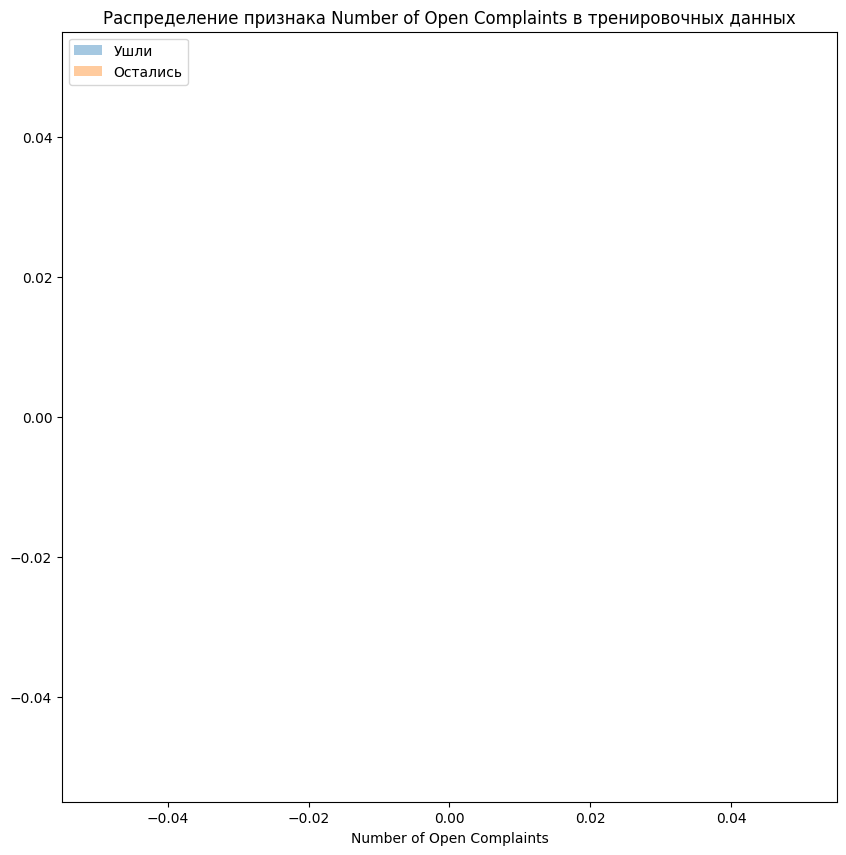

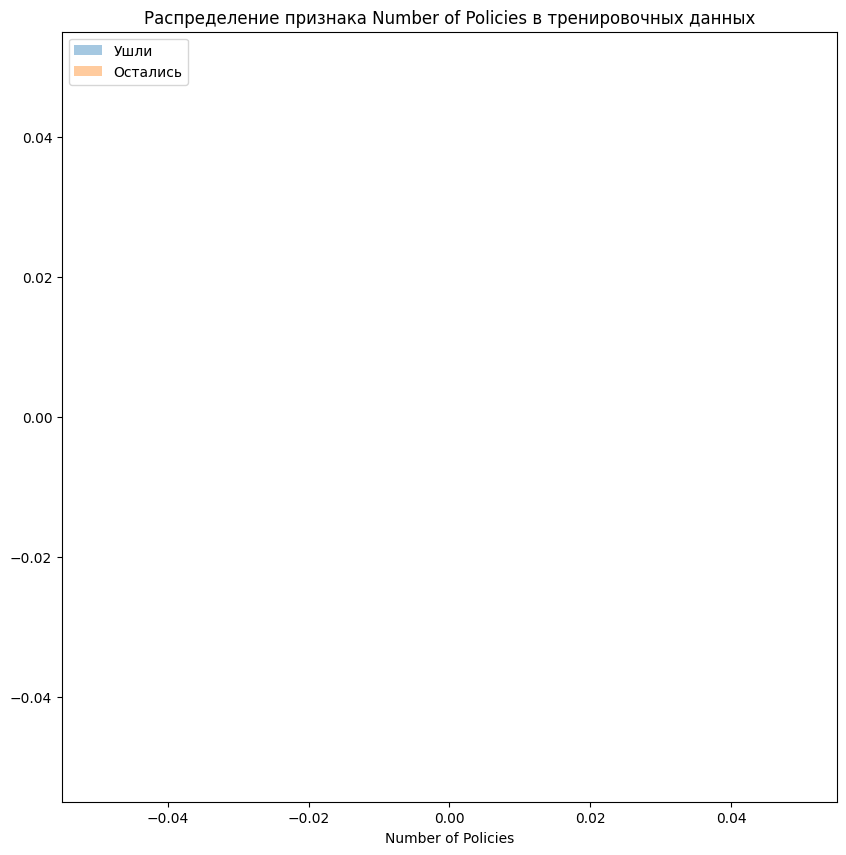

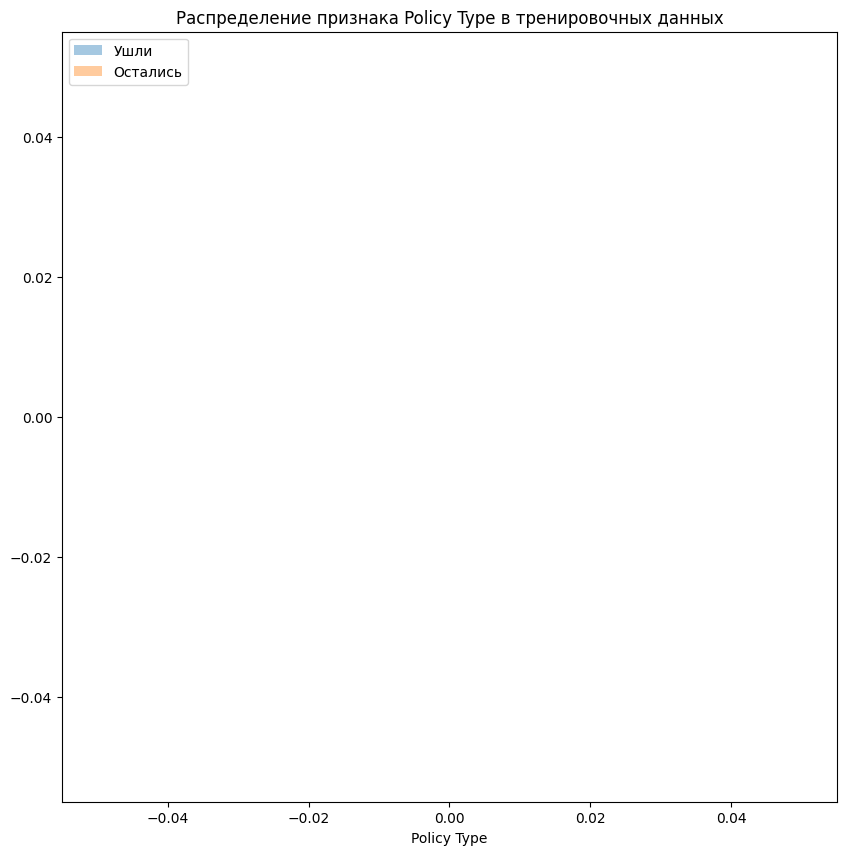

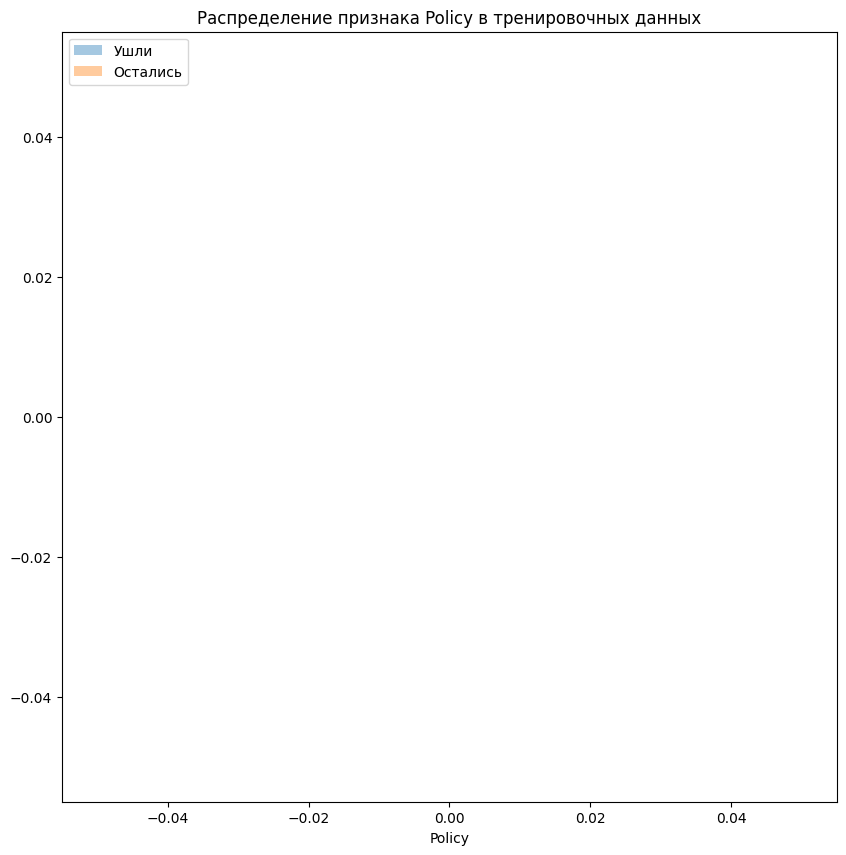

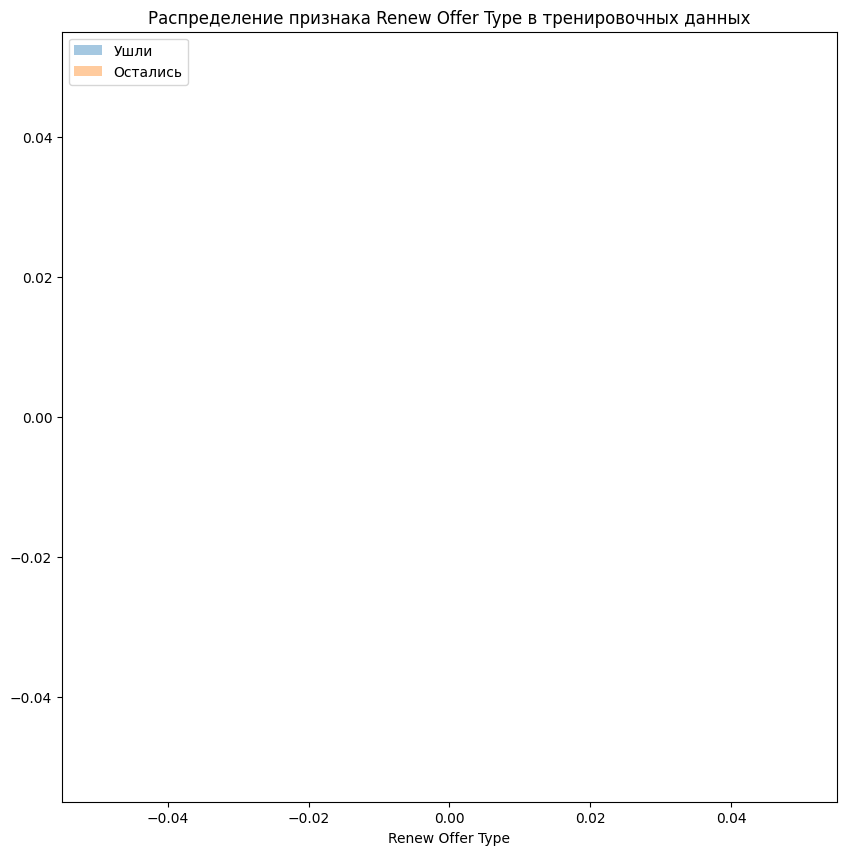

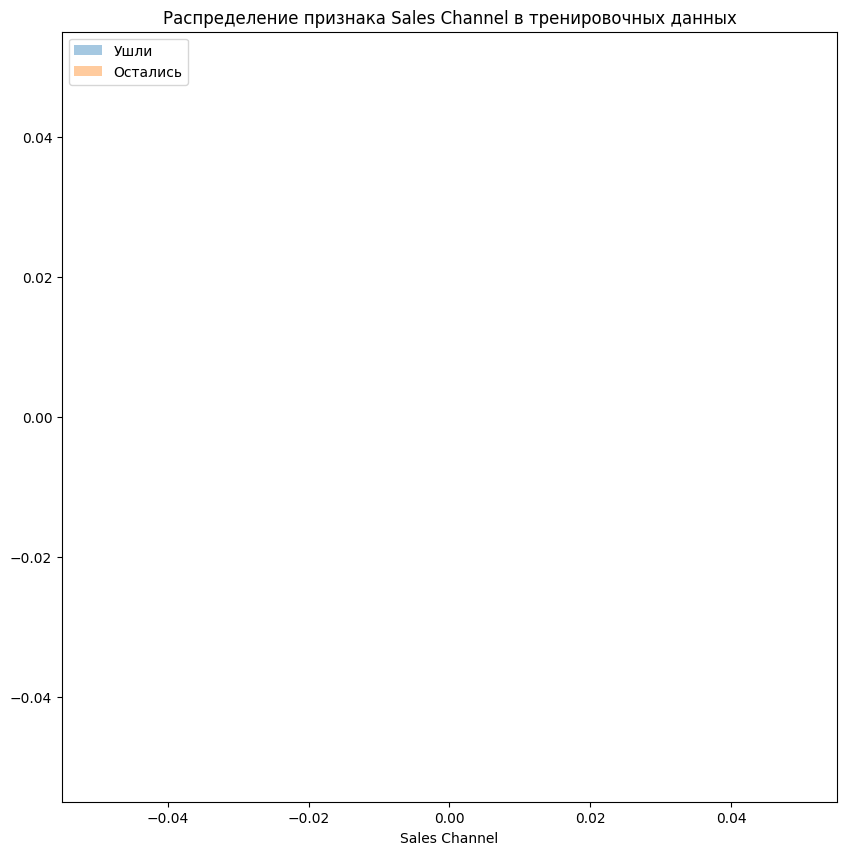

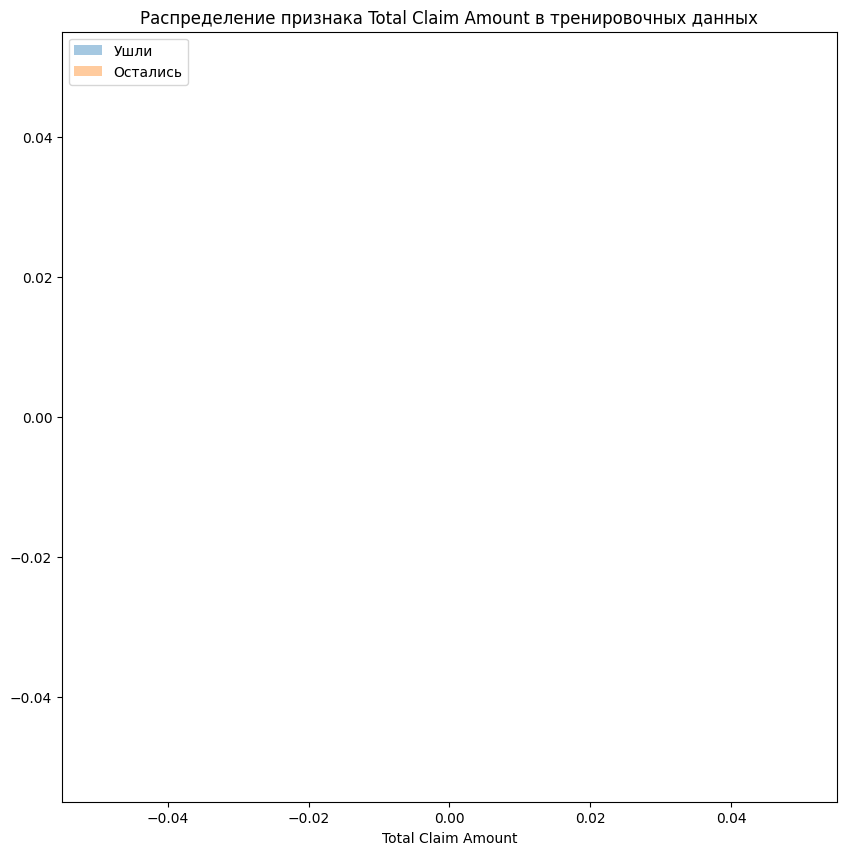

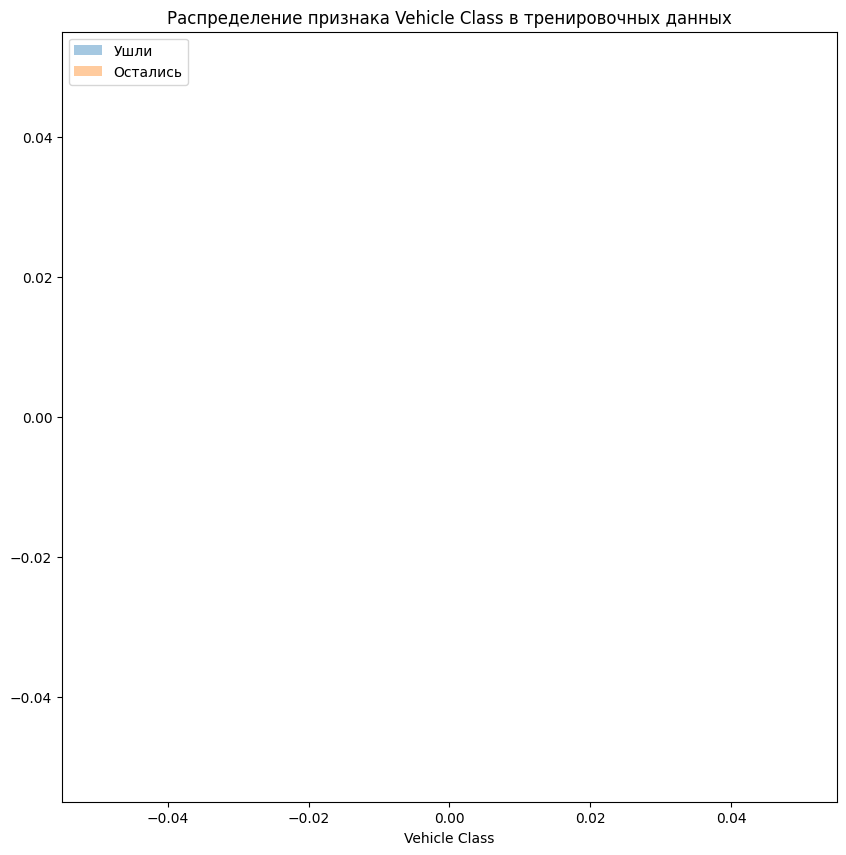

In [ ]:
response = train_data[train_data['Response'] == 'yes']
not_response = train_data[train_data['Response'] == 'no']


for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(response[col], label = 'Ушли')
    sns.distplot(not_response[col], label = 'Остались')
    plt.legend()

In [ ]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    response[col].hist(label = 'Ушли', alpha=0.3)
    not_response[col].hist(label = 'Остались', alpha = 0.3)
    plt.legend()

### Предобработка признаков

**Важно** Любое изменение признаков нужно делать и на тренировочной и на тестовой выборке

In [ ]:
test_data = pd.read_csv('LTV.csv')
print(test_data.shape)

(9134, 24)


In [ ]:
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame({"class" : ['business', 'economy', 'economy', 'economy_plus', 'None']})
df

,class
0,business
1,economy
2,economy
3,economy_plus
4,None


In [ ]:
le = LabelEncoder()

le.fit_transform(df)

array([1, 2, 2, 3, 0])

In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
for col in str_cols:
    X[col] = le.fit_transform(X[col])
    test_data[col] = le.fit_transform(test_data[col])


X.sample(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class
5117,8681,1,8678.508294,0,2,3,13,1,0,62366,...,22,87,0,8,1,4,0,2,51.316527,0
1603,4133,1,3420.452207,0,1,3,4,4,1,0,...,2,38,0,1,1,4,3,3,441.600000,0
2872,3592,4,6751.437153,0,1,3,46,4,1,0,...,14,78,0,9,1,5,0,0,456.000000,0
1710,2962,1,2742.844251,0,0,3,11,1,0,64519,...,6,29,1,1,0,2,2,1,331.200000,0
8237,4930,4,8112.323843,0,0,0,58,1,1,87403,...,1,63,0,2,1,3,0,0,456.290338,0
3530,787,4,2549.786069,0,0,0,34,1,1,72217,...,13,15,0,1,1,4,1,1,91.146661,0
970,6188,3,13350.120900,0,2,1,2,1,0,28919,...,5,88,0,3,1,4,2,0,830.400000,3
1427,7177,2,2489.337928,0,0,1,37,1,1,46051,...,16,34,0,1,1,3,2,1,302.400000,5
3373,3764,0,8382.630118,1,0,3,53,3,1,19683,...,17,41,1,9,1,4,0,3,561.600000,4
6281,6670,0,8048.371634,0,0,1,12,4,0,0,...,24,90,0,9,1,5,1,1,1339.303486,3


In [ ]:
y = le.fit_transform(y)
y[:10]

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

### Корреляция признаков

Корреля́ция (от лат. correlatio «соотношение»), или корреляцио́нная зави́симость — статистическая взаимосвязь двух или более случайных величин (либо величин, которые можно с некоторой допустимой степенью точности считать таковыми). При этом изменения значений одной или нескольких из этих величин сопутствуют систематическому изменению значений другой или других величин **(с) Википедия**


**Корреляция** - величина показывающая связь двух и более величин. Существуют различные виды корреляций, мы не будем останавливаться на этом, для желающих разобраться ссылки на материалы в конце урока

**Корреляционная матрица** - квадратная матрица, элементы которой представляют собой корреляцию величин
В библиотеке `pandas.DataFrame` есть атрибут `corr()`, который считает корреляционную матрицу

In [ ]:
# corr()

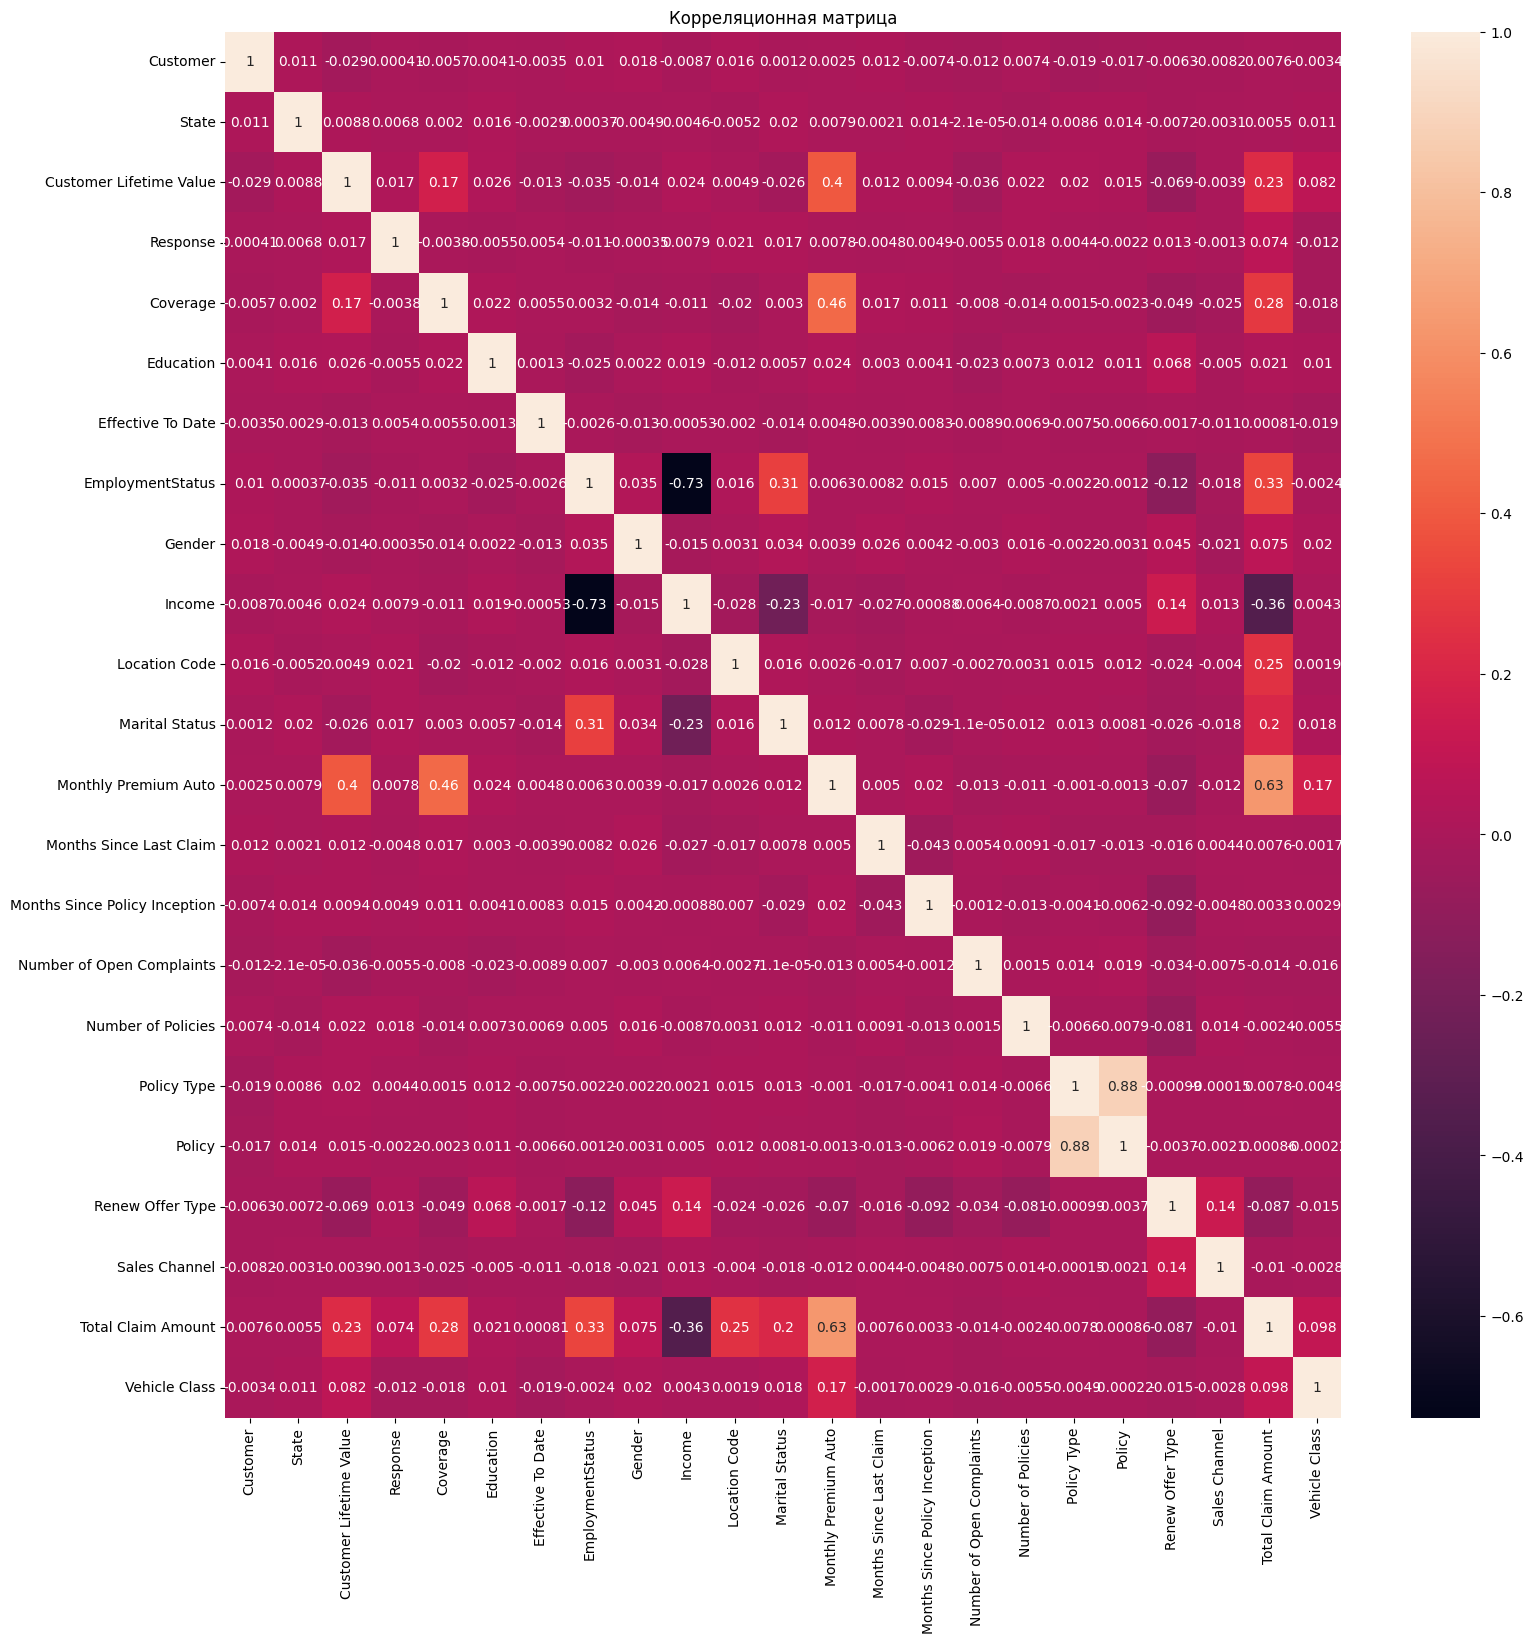

In [ ]:
# Преобразуем матрицу признаков в DataFrame
train_data_trasformed = pd.DataFrame(X_sc, columns = X.columns)
train_data_trasformed['Response'] = y
# Создаем корреляционную матрицу
corr_m = train_data_trasformed.corr()



# Визуализируем матрицу при помощи sns.heatmap
plt.figure(figsize = (18, 18))
plt.title('Корреляционная матрица')
sns.heatmap(corr_m, annot = True)
plt.show()

Обучение различных моделей
Будем сравнивать между собой 3 модели: Логистическую регрессию, классификатор на решающем дереве, и случайный лес

In [ ]:
# Логистическая регрессия
from sklearn.linear_model import LogisticRegression

# Кросс-валидация
from sklearn.model_selection import cross_validate

log_reg = LogisticRegression(C = 0.8, random_state = 42, max_iter = 500)

cv_log_reg = cross_validate(log_reg, X_sc, y, cv = 5, scoring = 'roc_auc')

print("Результаты Логистической регрессии:", sum(cv_log_reg['test_score']) / len(cv_log_reg['test_score']))

Результаты Логистической регрессии: nan


In [ ]:
# Решающее дерево
from sklearn.tree import DecisionTreeClassifier


dec_tree = DecisionTreeClassifier(random_state = 42) # Можно найти более оптимальные гиперпараметры

cv_dec_tree = cross_validate(dec_tree, X_sc, y, cv = 5, scoring = 'roc_auc')

print("Результаты решающего дерева:", sum(cv_dec_tree['test_score']) / len(cv_dec_tree['test_score']))

Результаты решающего дерева: nan


In [ ]:
# Случайный лес
from sklearn.ensemble import RandomForestClassifier


ran_for = RandomForestClassifier(random_state = 42) # Можно найти более оптимальные гиперпараметры

cv_ran_for = cross_validate(ran_for, X_sc, y, cv = 5, scoring = 'roc_auc')

print("Результаты решающего дерева:", sum(cv_ran_for['test_score']) / len(cv_ran_for['test_score']))

# Как видно, лучший результат показал случайный лес

## Интерпретация модели и важность признаков

Для того чтобы понять что заставляет пользователей уходить и оставаться, нужно понять влияние признаков. При работе с логистической регрессией можно использовать атрибут `coef_`

**Важно** атрибут `coef_` работает только когда метод `fit()` был явно вызван

In [ ]:
log_reg.fit(X, y)
print("Коэффициенты в линейной регрессии:", log_reg.coef_)

Коэффициенты в линейной регрессии: [[-2.50762862e-05 -1.33047457e-04 -6.97713699e-06  2.40796596e-05
   2.40322355e-05  8.04890727e-06 -2.12201913e-03 -2.10718065e-04
  -5.55669218e-05 -3.81387656e-06 -9.03801265e-05 -1.25782785e-04
  -1.92344733e-03 -1.33144640e-03 -1.70034509e-03 -2.07355882e-05
  -3.60156056e-04 -6.08982897e-05 -2.56699389e-04 -9.48670414e-05
  -8.38024275e-05 -3.98360584e-04  6.03725641e-06]
 [ 3.65667938e-05  2.98859152e-04  2.13642899e-06  4.64958948e-05
   1.01679070e-05  1.00133287e-04  4.37923978e-03  6.41206906e-04
   1.49843574e-04  7.54961293e-07  2.28709679e-04  2.92291570e-04
   9.17435297e-03  3.42511721e-03  2.09897168e-03  7.89729013e-05
   6.41616666e-04  1.51394283e-04  7.05543578e-04  1.68337352e-04
   2.23689912e-04 -6.83422129e-04  2.34587795e-04]
 [-1.14905076e-05 -1.65811695e-04  4.84070800e-06 -7.05755544e-05
  -3.42001425e-05 -1.08182194e-04 -2.25722065e-03 -4.30488841e-04
  -9.42766523e-05  3.05891527e-06 -1.38329552e-04 -1.66508785e-04
  -7.

При работе с одним решающем дереве интерпретировать результаты достаточно просто, для этого есть атрибут feature_importances_ Он показывает долю важности признака на целевую переменную

Важно атрибут feature_importances_ работает только когда метод fit() был явно вызван

In [ ]:
dec_tree.fit(X, y)
print("Важность признаков решающего дерева", dec_tree.feature_importances_)

Важность признаков решающего дерева [0.10243198 0.02902716 0.09715332 0.01972941 0.00490328 0.03419163
 0.08089627 0.00970265 0.00997828 0.07860719 0.00451786 0.02150805
 0.07964924 0.08313637 0.08248002 0.01638415 0.03462456 0.00558352
 0.02788962 0.02343091 0.02536737 0.1091581  0.01964905]


Некоторые типы моделей (например экстримально случайный лес и все что основано на бустинге) интерпретировать стандартными способами практически невозможно.

Для интерпретации таких моделей можно использовать библиотеку shap, которая работает на основе ядра и вектора Шэпли - важнейших понятий в коалиционной теории игр

In [ ]:
# чтобы установить
!pip install shap

Обучение различных моделей
Будем сравнивать между собой 3 модели: Логистическую регрессию, классификатор на решающем дереве, и случайный лес

In [ ]:
# Логистическая регрессия
from sklearn.linear_model import LogisticRegression

# Кросс-валидация
from sklearn.model_selection import cross_validate

log_reg = LogisticRegression(C = 0.8, random_state = 42, max_iter = 500)

cv_log_reg = cross_validate(log_reg, X_sc, y, cv = 5, scoring = 'roc_auc')

print("Результаты Логистической регрессии:", sum(cv_log_reg['test_score']) / len(cv_log_reg['test_score']))

Результаты Логистической регрессии: nan


In [ ]:
# Решающее дерево
from sklearn.tree import DecisionTreeClassifier


dec_tree = DecisionTreeClassifier(random_state = 42) # Можно найти более оптимальные гиперпараметры

cv_dec_tree = cross_validate(dec_tree, X_sc, y, cv = 5, scoring = 'roc_auc')

print("Результаты решающего дерева:", sum(cv_dec_tree['test_score']) / len(cv_dec_tree['test_score']))

Результаты решающего дерева: nan


In [ ]:
# Случайный лес
from sklearn.ensemble import RandomForestClassifier


ran_for = RandomForestClassifier(random_state = 42) # Можно найти более оптимальные гиперпараметры

cv_ran_for = cross_validate(ran_for, X_sc, y, cv = 5, scoring = 'roc_auc')

print("Результаты решающего дерева:", sum(cv_ran_for['test_score']) / len(cv_ran_for['test_score']))

Результаты решающего дерева: nan


# Как видно, лучший результат показал случайный лес

Интерпретация модели и важность признаков
Для того чтобы понять что заставляет пользователей уходить и оставаться, нужно понять влияние признаков. При работе с логистической регрессией можно использовать атрибут coef_

Важно атрибут coef_ работает только когда метод fit() был явно вызван

In [ ]:
log_reg.fit(X, y)
print("Коэффициенты в линейной регрессии:", log_reg.coef_)



Коэффициенты в линейной регрессии: [[-2.50762862e-05 -1.33047457e-04 -6.97713699e-06  2.40796596e-05
   2.40322355e-05  8.04890727e-06 -2.12201913e-03 -2.10718065e-04
  -5.55669218e-05 -3.81387656e-06 -9.03801265e-05 -1.25782785e-04
  -1.92344733e-03 -1.33144640e-03 -1.70034509e-03 -2.07355882e-05
  -3.60156056e-04 -6.08982897e-05 -2.56699389e-04 -9.48670414e-05
  -8.38024275e-05 -3.98360584e-04  6.03725641e-06]
 [ 3.65667938e-05  2.98859152e-04  2.13642899e-06  4.64958948e-05
   1.01679070e-05  1.00133287e-04  4.37923978e-03  6.41206906e-04
   1.49843574e-04  7.54961293e-07  2.28709679e-04  2.92291570e-04
   9.17435297e-03  3.42511721e-03  2.09897168e-03  7.89729013e-05
   6.41616666e-04  1.51394283e-04  7.05543578e-04  1.68337352e-04
   2.23689912e-04 -6.83422129e-04  2.34587795e-04]
 [-1.14905076e-05 -1.65811695e-04  4.84070800e-06 -7.05755544e-05
  -3.42001425e-05 -1.08182194e-04 -2.25722065e-03 -4.30488841e-04
  -9.42766523e-05  3.05891527e-06 -1.38329552e-04 -1.66508785e-04
  -7.

# При работе с одним решающем дереве интерпретировать результаты достаточно просто, для этого есть атрибут `feature_importances_` Он показывает долю важности признака на целевую переменную

**Важно** атрибут `feature_importances_` работает только когда метод `fit()` был явно вызван

In [ ]:
dec_tree.fit(X, y)
print("Важность признаков решающего дерева", dec_tree.feature_importances_)

Важность признаков решающего дерева [0.10243198 0.02902716 0.09715332 0.01972941 0.00490328 0.03419163
 0.08089627 0.00970265 0.00997828 0.07860719 0.00451786 0.02150805
 0.07964924 0.08313637 0.08248002 0.01638415 0.03462456 0.00558352
 0.02788962 0.02343091 0.02536737 0.1091581  0.01964905]


Некоторые типы моделей (например экстримально случайный лес и все что основано на бустинге) интерпретировать стандартными способами практически невозможно.

Для интерпретации таких моделей можно использовать библиотеку shap, которая работает на основе ядра и вектора Шэпли - важнейших понятий в коалиционной теории игр

In [ ]:
# чтобы установить
!pip install shap

In [ ]:
import shap
# Загружаем JS шаблоны для визуализации
shap.initjs()

# Обязателен явный вызов метода fit
ran_for.fit(X, y)

print("Обучили модель, переходим к визуализации")
# Интерпретируем предсказания модели при помощи SHAP
explainer = shap.TreeExplainer(ran_for)
shap_values = explainer.shap_values(X)

Обучили модель, переходим к визуализации


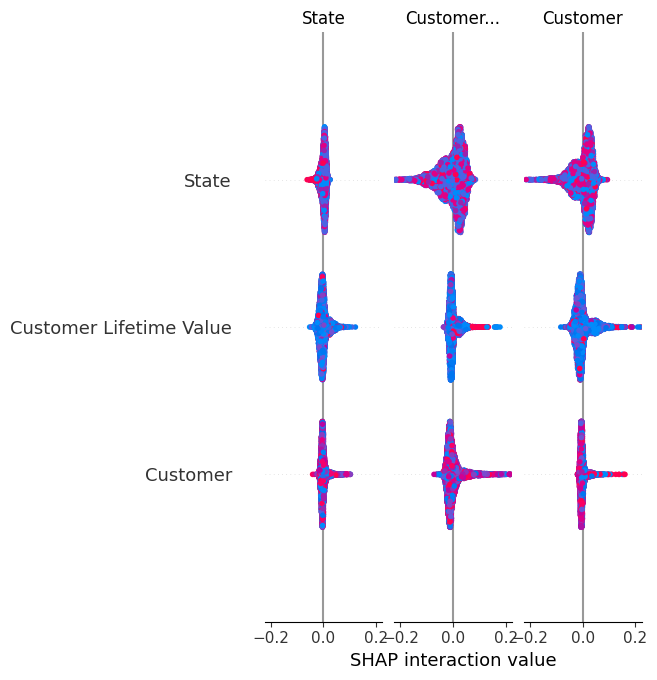

In [ ]:
# Общий график
shap.summary_plot(shap_values, X, plot_type="bar")